In [ ]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

%matplotlib inline
# for normalization
from sklearn import preprocessing

# for visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# for Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# for data imbalance, SMOTE
from imblearn.over_sampling import SMOTE
from scipy import stats

# to calculate the performance of the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, quantile_transform
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
# from gseapy import enrichr
from scipy.spatial.distance import pdist, squareform
import patsy
# from batchglm.api import BatchGLM
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.packages import importr
# edgeR = importr('edgeR')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/GSE101638.xlsx')

In [ ]:
print(df.shape)

(62858, 43)


In [ ]:
df.head()

Refseq         2         4        5         6          7         9  \
0  NM_000014  0.000000  0.000000  0.00000  0.000000   0.000000  0.000000   
1  NM_000015  0.257883  0.159159  1.46878  0.247729   0.488727  0.092796   
2  NM_000016  5.552180  6.711660  3.96225  7.439490   2.857600  1.170080   
3  NM_000017  6.026500  7.977420  4.69697  6.168840  11.858000  6.754560   
4  NM_000018  0.000000  0.000000  0.00000  0.000000   0.000000  0.000000   

        12         14        15  ...        61         62        69       70  \
0  0.00000   0.000000  0.000000  ...  0.000000   0.000000   0.00000  0.00000   
1  0.58683   0.314581  0.130976  ...  0.019725   0.396098   0.00000  1.99119   
2  9.82022   1.817830  5.565920  ...  6.758060   4.666890  11.47450  9.99418   
3  7.97344  17.720300  5.575240  ...  4.433300  15.832100   6.15586  2.64982   
4  0.00000   0.000000  0.000000  ...  0.000000   0.000000   0.00000  0.00000   

        74       75         77         79        81         83  
0  0.00000  0.00000   0.000000   0.000000  0.000000   0.000000  
1  1.97565  2.62769   0.316963   0.442532  0.159904   0.101346  
2  6.84923  5.77571  17.870200   4.436470  4.504440   8.731990  
3  7.52890  8.78269   5.205700  13.386100  8.412960  10.832400  
4  0.00000  0.00000   0.000000   0.000000  0.000000   0.000000  

[5 rows x 43 columns]

In [ ]:
df.dtypes

Refseq     object
2         float64
4         float64
5         float64
6         float64
7         float64
9         float64
12        float64
14        float64
15        float64
17        float64
19        float64
22        float64
23        float64
24        float64
30        float64
31        float64
32        float64
33        float64
34        float64
37        float64
38        float64
40        float64
43        float64
44        float64
45        float64
47        float64
50        float64
53        float64
54        float64
57        float64
58        float64
59        float64
61        float64
62        float64
69        float64
70        float64
74        float64
75        float64
77        float64
79        float64
81        float64
83        float64
dtype: object

In [ ]:
df = df.drop("Refseq", axis=1)

In [ ]:
df.isnull()

2      4      5      6      7      9      12     14     15     17  \
0      False  False  False  False  False  False  False  False  False  False   
1      False  False  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False  False  False  False  False  False  False  False  False  False   
4      False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
62853  False  False  False  False  False  False  False  False  False  False   
62854  False  False  False  False  False  False  False  False  False  False   
62855  False  False  False  False  False  False  False  False  False  False   
62856  False  False  False  False  False  False  False  False  False  False   
62857  False  False  False  False  False  False  False  False  False  False   

       ...     61     62     69     70     74     75     77     79     81  \
0      ...  False  False  False  False  False  False  False  False  False   
1      ...  False  False  False  False  False  False  False  False  False   
2      ...  False  False  False  False  False  False  False  False  False   
3      ...  False  False  False  False  False  False  False  False  False   
4      ...  False  False  False  False  False  False  False  False  False   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
62853  ...  False  False  False  False  False  False  False  False  False   
62854  ...  False  False  False  False  False  False  False  False  False   
62855  ...  False  False  False  False  False  False  False  False  False   
62856  ...  False  False  False  False  False  False  False  False  False   
62857  ...  False  False  False  False  False  False  False  False  False   

          83  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
62853  False  
62854  False  
62855  False  
62856  False  
62857  False  

[62858 rows x 42 columns]

In [ ]:
df.isnull().sum()

2     0
4     0
5     0
6     0
7     0
9     0
12    0
14    0
15    0
17    0
19    0
22    0
23    0
24    0
30    0
31    0
32    0
33    0
34    0
37    0
38    0
40    0
43    0
44    0
45    0
47    0
50    0
53    0
54    0
57    0
58    0
59    0
61    0
62    0
69    0
70    0
74    0
75    0
77    0
79    0
81    0
83    0
dtype: int64

In [ ]:
df.head()

2         4        5         6          7         9        12  \
0  0.000000  0.000000  0.00000  0.000000   0.000000  0.000000  0.00000   
1  0.257883  0.159159  1.46878  0.247729   0.488727  0.092796  0.58683   
2  5.552180  6.711660  3.96225  7.439490   2.857600  1.170080  9.82022   
3  6.026500  7.977420  4.69697  6.168840  11.858000  6.754560  7.97344   
4  0.000000  0.000000  0.00000  0.000000   0.000000  0.000000  0.00000   

          14        15        17  ...        61         62        69       70  \
0   0.000000  0.000000   0.00000  ...  0.000000   0.000000   0.00000  0.00000   
1   0.314581  0.130976   0.00000  ...  0.019725   0.396098   0.00000  1.99119   
2   1.817830  5.565920  10.20630  ...  6.758060   4.666890  11.47450  9.99418   
3  17.720300  5.575240   7.77144  ...  4.433300  15.832100   6.15586  2.64982   
4   0.000000  0.000000   0.00000  ...  0.000000   0.000000   0.00000  0.00000   

        74       75         77         79        81         83  
0  0.00000  0.00000   0.000000   0.000000  0.000000   0.000000  
1  1.97565  2.62769   0.316963   0.442532  0.159904   0.101346  
2  6.84923  5.77571  17.870200   4.436470  4.504440   8.731990  
3  7.52890  8.78269   5.205700  13.386100  8.412960  10.832400  
4  0.00000  0.00000   0.000000   0.000000  0.000000   0.000000  

[5 rows x 42 columns]

In [ ]:
df.describe()

2              4              5              6   \
count  62858.000000   62858.000000   62858.000000   62858.000000   
mean      10.948014      18.748305      10.701656      24.235148   
std      253.906981    2288.185442     585.776799    3912.968456   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       0.000000       0.000000   
75%        1.597873       1.399540       1.211172       1.229907   
max    44494.000000  572955.000000  144719.000000  980682.000000   

                 7              9              12            14  \
count  6.285800e+04   62858.000000   62858.000000  62858.000000   
mean   3.773068e+01      17.646773      12.396072     11.854002   
std    7.410333e+03    1458.928156     876.565696    375.613526   
min    0.000000e+00       0.000000       0.000000      0.000000   
25%    0.000000e+00       0.000000       0.000000      0.000000   
50%    0.000000e+00       0.000000       0.000000      0.000000   
75%    8.124655e-01       0.592285       1.323732      0.906553   
max    1.857660e+06  354566.000000  217100.000000  81262.900000   

                  15             17  ...             61            62  \
count   62858.000000   62858.000000  ...   62858.000000  62858.000000   
mean       15.898266      10.988320  ...      16.703204     12.662107   
std      1726.341875     434.441854  ...    1326.269055    419.219715   
min         0.000000       0.000000  ...       0.000000      0.000000   
25%         0.000000       0.000000  ...       0.000000      0.000000   
50%         0.000000       0.000000  ...       0.000000      0.000000   
75%         1.215307       1.589260  ...       1.322188      1.241975   
max    431838.000000  103872.000000  ...  325371.000000  71224.000000   

                 69             70             74             75  \
count  62858.000000   62858.000000   62858.000000   62858.000000   
mean      10.686343      12.930610      18.297364      20.312674   
std      295.465484    1186.241926    2483.111348    3068.531738   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       0.000000       0.000000   
75%        1.292110       1.476082       1.516258       1.317107   
max    55298.400000  295401.000000  621673.000000  768872.000000   

                  77             79             81            83  
count   62858.000000   62858.000000   62858.000000  62858.000000  
mean       13.297003      14.708890      12.378115     11.004244  
std      1031.351128     940.133067     770.340248    443.440599  
min         0.000000       0.000000       0.000000      0.000000  
25%         0.000000       0.000000       0.000000      0.000000  
50%         0.000000       0.000000       0.000000      0.000000  
75%         1.333292       1.532925       1.254493      1.329382  
max    250219.000000  229677.000000  178293.000000  90570.100000  

[8 rows x 42 columns]

In [ ]:
# Replace zeros with NaN
df = df.replace(0, np.nan)

In [ ]:
df

2         4        5         6          7         9        12  \
0           NaN       NaN      NaN       NaN        NaN       NaN      NaN   
1      0.257883  0.159159  1.46878  0.247729   0.488727  0.092796  0.58683   
2      5.552180  6.711660  3.96225  7.439490   2.857600  1.170080  9.82022   
3      6.026500  7.977420  4.69697  6.168840  11.858000  6.754560  7.97344   
4           NaN       NaN      NaN       NaN        NaN       NaN      NaN   
...         ...       ...      ...       ...        ...       ...      ...   
62853       NaN       NaN      NaN       NaN        NaN       NaN      NaN   
62854       NaN       NaN      NaN       NaN        NaN       NaN      NaN   
62855       NaN       NaN      NaN       NaN        NaN       NaN      NaN   
62856       NaN       NaN      NaN       NaN        NaN       NaN      NaN   
62857       NaN       NaN      NaN       NaN        NaN       NaN      NaN   

              14        15        17  ...        61         62        69  \
0            NaN       NaN       NaN  ...       NaN        NaN       NaN   
1       0.314581  0.130976       NaN  ...  0.019725   0.396098       NaN   
2       1.817830  5.565920  10.20630  ...  6.758060   4.666890  11.47450   
3      17.720300  5.575240   7.77144  ...  4.433300  15.832100   6.15586   
4            NaN       NaN       NaN  ...       NaN        NaN       NaN   
...          ...       ...       ...  ...       ...        ...       ...   
62853        NaN       NaN       NaN  ...       NaN        NaN       NaN   
62854        NaN       NaN       NaN  ...       NaN        NaN       NaN   
62855        NaN       NaN       NaN  ...       NaN        NaN       NaN   
62856        NaN       NaN       NaN  ...       NaN        NaN       NaN   
62857        NaN       NaN       NaN  ...       NaN        NaN       NaN   

            70       74       75         77         79        81         83  
0          NaN      NaN      NaN        NaN        NaN       NaN        NaN  
1      1.99119  1.97565  2.62769   0.316963   0.442532  0.159904   0.101346  
2      9.99418  6.84923  5.77571  17.870200   4.436470  4.504440   8.731990  
3      2.64982  7.52890  8.78269   5.205700  13.386100  8.412960  10.832400  
4          NaN      NaN      NaN        NaN        NaN       NaN        NaN  
...        ...      ...      ...        ...        ...       ...        ...  
62853      NaN      NaN      NaN        NaN        NaN       NaN        NaN  
62854      NaN      NaN      NaN        NaN        NaN       NaN        NaN  
62855      NaN      NaN      NaN        NaN        NaN       NaN        NaN  
62856  7.18599      NaN      NaN        NaN        NaN       NaN        NaN  
62857      NaN      NaN      NaN        NaN        NaN       NaN        NaN  

[62858 rows x 42 columns]

In [ ]:
# Remove rows with any NaN values
df = df.dropna(how='any', axis=0)

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the boxplot for all columns in the DataFrame
data.boxplot(ax=ax)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title and axis labels
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

In [ ]:
df

2          4          5          6          7          9   \
3       6.026500   7.977420   4.696970   6.168840  11.858000   6.754560   
5      15.703000  19.685800  19.903100  21.105700  41.860200  22.580800   
10      1.014950   1.891260   8.908720   1.012490   1.183690   5.450200   
15     47.002400   5.560690   5.098120   3.566440  16.245700   2.954280   
17     10.657800  18.483300  18.787600  14.621700  14.998800  17.453900   
...          ...        ...        ...        ...        ...        ...   
62782   4.427520   1.642360   2.219730   6.734590   5.184520   1.095240   
62826   1.093060   0.191862   1.322100   0.250596   1.299010   0.084698   
62829   7.063790   0.637280   1.028350   0.671693   0.540484   0.725567   
62839   0.610763   0.311549   0.302978   0.125141   0.184912   0.039475   
62851   0.373329   0.182972   0.426987   0.210959   0.339351   0.126436   

              12         14         15         17  ...         61         62  \
3       7.973440  17.720300   5.575240   7.771440  ...   4.433300  15.832100   
5      39.875000  14.410900  17.723100  30.702600  ...  47.816900  13.003600   
10      7.575470   3.343930   1.797590   5.236370  ...   5.685130   1.630880   
15      7.571890   6.071230   2.084900   3.422570  ...   2.724320   1.718460   
17     17.353200  30.123100  14.221700  18.306700  ...  16.284600  29.795300   
...          ...        ...        ...        ...  ...        ...        ...   
62782   2.369180   0.564121   2.177590   3.258430  ...   4.692800   3.250120   
62826   0.307412   0.470342   0.976147   0.652365  ...   0.306697   1.642100   
62829   1.190020   0.264482   0.913976   2.504400  ...   2.039820   0.406280   
62839   0.268355   0.560186   0.262795   0.762916  ...   0.116425   0.273807   
62851   0.687624   0.666742   0.297428   0.845013  ...   0.327550   0.269844   

              69         70         74         75         77         79  \
3       6.155860   2.649820   7.528900   8.782690   5.205700  13.386100   
5      21.422900  25.719200  31.466300  31.904200  26.968700  25.145500   
10      5.597350   5.596790  12.277300   7.516910   6.791820   4.477010   
15      4.918160   2.894840   2.151750   3.941770   6.735520  13.372000   
17     18.487400  20.600300  21.037700  24.329800  27.068700  17.364700   
...          ...        ...        ...        ...        ...        ...   
62782   2.799540   5.742910   7.463210   3.507210   3.222790   4.403850   
62826   0.891066   0.461039   1.125490   0.690841   0.378103   1.569550   
62829   3.485650   3.705890   3.430440   1.555470   1.994190   0.832475   
62839   0.411491   0.602400   0.646907   0.201746   0.450101   0.370126   
62851   0.318066   0.546175   0.378984   0.552566   0.395877   0.320320   

              81         83  
3       8.412960  10.832400  
5      33.147800  36.454400  
10      5.615620  28.706400  
15      1.572140  67.139500  
17     17.406500  18.740300  
...          ...        ...  
62782   4.302130   2.356170  
62826   0.613132   0.491083  
62829   3.250720   4.284180  
62839   0.884286   0.359123  
62851   0.566465   0.441874  

[9867 rows x 42 columns]

In [ ]:
log_counts = np.log2(df + 1)  # Log2 transformation

In [ ]:
log_counts

2         4         5         6         7         9         12  \
3      2.812806  3.166301  2.510195  2.841740  3.684594  2.955045  3.165661   
5      4.062035  4.370569  4.385645  4.466347  5.421567  4.559541  5.353147   
10     1.010744  1.531698  3.308699  1.008982  1.126768  2.689344  3.100216   
15     5.585035  2.713848  2.608365  2.191070  4.108165  1.983415  3.099613   
17     3.543224  4.284166  4.306525  3.965480  3.999892  4.205854  4.197960   
...         ...       ...       ...       ...       ...       ...       ...   
62782  2.440293  1.401827  1.686940  2.951325  2.628662  1.067116  1.752398   
62826  1.065614  0.253217  1.215430  0.322616  1.201013  0.117294  0.386714   
62829  3.011458  0.711301  1.020307  0.741310  0.623384  0.787070  1.130944   
62839  0.687744  0.391272  0.381813  0.170106  0.244780  0.055855  0.342959   
62851  0.457677  0.242416  0.512972  0.276150  0.421534  0.171765  0.754994   

             14        15        17  ...        61        62        69  \
3      4.226532  2.717044  3.132814  ...  2.441829  4.073143  2.839125   
5      3.945879  4.226747  4.986529  ...  5.609309  3.807726  4.486901   
10     2.119001  1.484185  2.640707  ...  2.740956  1.395545  2.721887   
15     2.821961  1.625224  2.144885  ...  1.896977  1.442790  2.565149   
17     4.959914  3.928058  4.271030  ...  4.111415  4.944638  4.284470   
...         ...       ...       ...  ...       ...       ...       ...   
62782  0.645352  1.667933  2.090322  ...  2.509138  2.087504  1.925825   
62826  0.556152  0.982690  0.724532  ...  0.385925  1.401685  0.919200   
62829  0.338547  0.936573  1.809167  ...  1.603986  0.491884  2.165317   
62839  0.641718  0.336620  0.817964  ...  0.158886  0.349147  0.497220   
62851  0.737031  0.375654  0.883631  ...  0.408766  0.344651  0.398423   

             70        74        75        77        79        81        83  
3      1.867825  3.092360  3.290231  2.633594  3.846604  3.234648  3.564671  
5      4.739805  5.020871  5.040200  4.805741  4.708491  5.093721  5.227063  
10     2.721764  3.730890  3.090330  2.961960  2.453389  2.725876  4.892702  
15     1.961564  1.656153  2.305028  2.951498  3.845189  1.362969  6.090419  
17     4.432979  4.461902  4.662764  4.810890  4.198863  4.202143  4.303072  
...         ...       ...       ...       ...       ...       ...       ...  
62782  2.753371  3.081205  2.172235  2.078197  2.433988  2.406572  1.746816  
62826  0.546995  1.087795  0.757741  0.462684  1.361516  0.689864  0.576361  
62829  2.234468  2.147450  1.353589  1.582166  0.873794  2.087707  2.401680  
62839  0.680234  0.719759  0.265132  0.536153  0.454309  0.914018  0.442676  
62851  0.628704  0.463606  0.634655  0.481172  0.400888  0.647513  0.527945  

[9867 rows x 42 columns]

In [ ]:
log_counts.isnull().sum()

2     0
4     0
5     0
6     0
7     0
9     0
12    0
14    0
15    0
17    0
19    0
22    0
23    0
24    0
30    0
31    0
32    0
33    0
34    0
37    0
38    0
40    0
43    0
44    0
45    0
47    0
50    0
53    0
54    0
57    0
58    0
59    0
61    0
62    0
69    0
70    0
74    0
75    0
77    0
79    0
81    0
83    0
dtype: int64

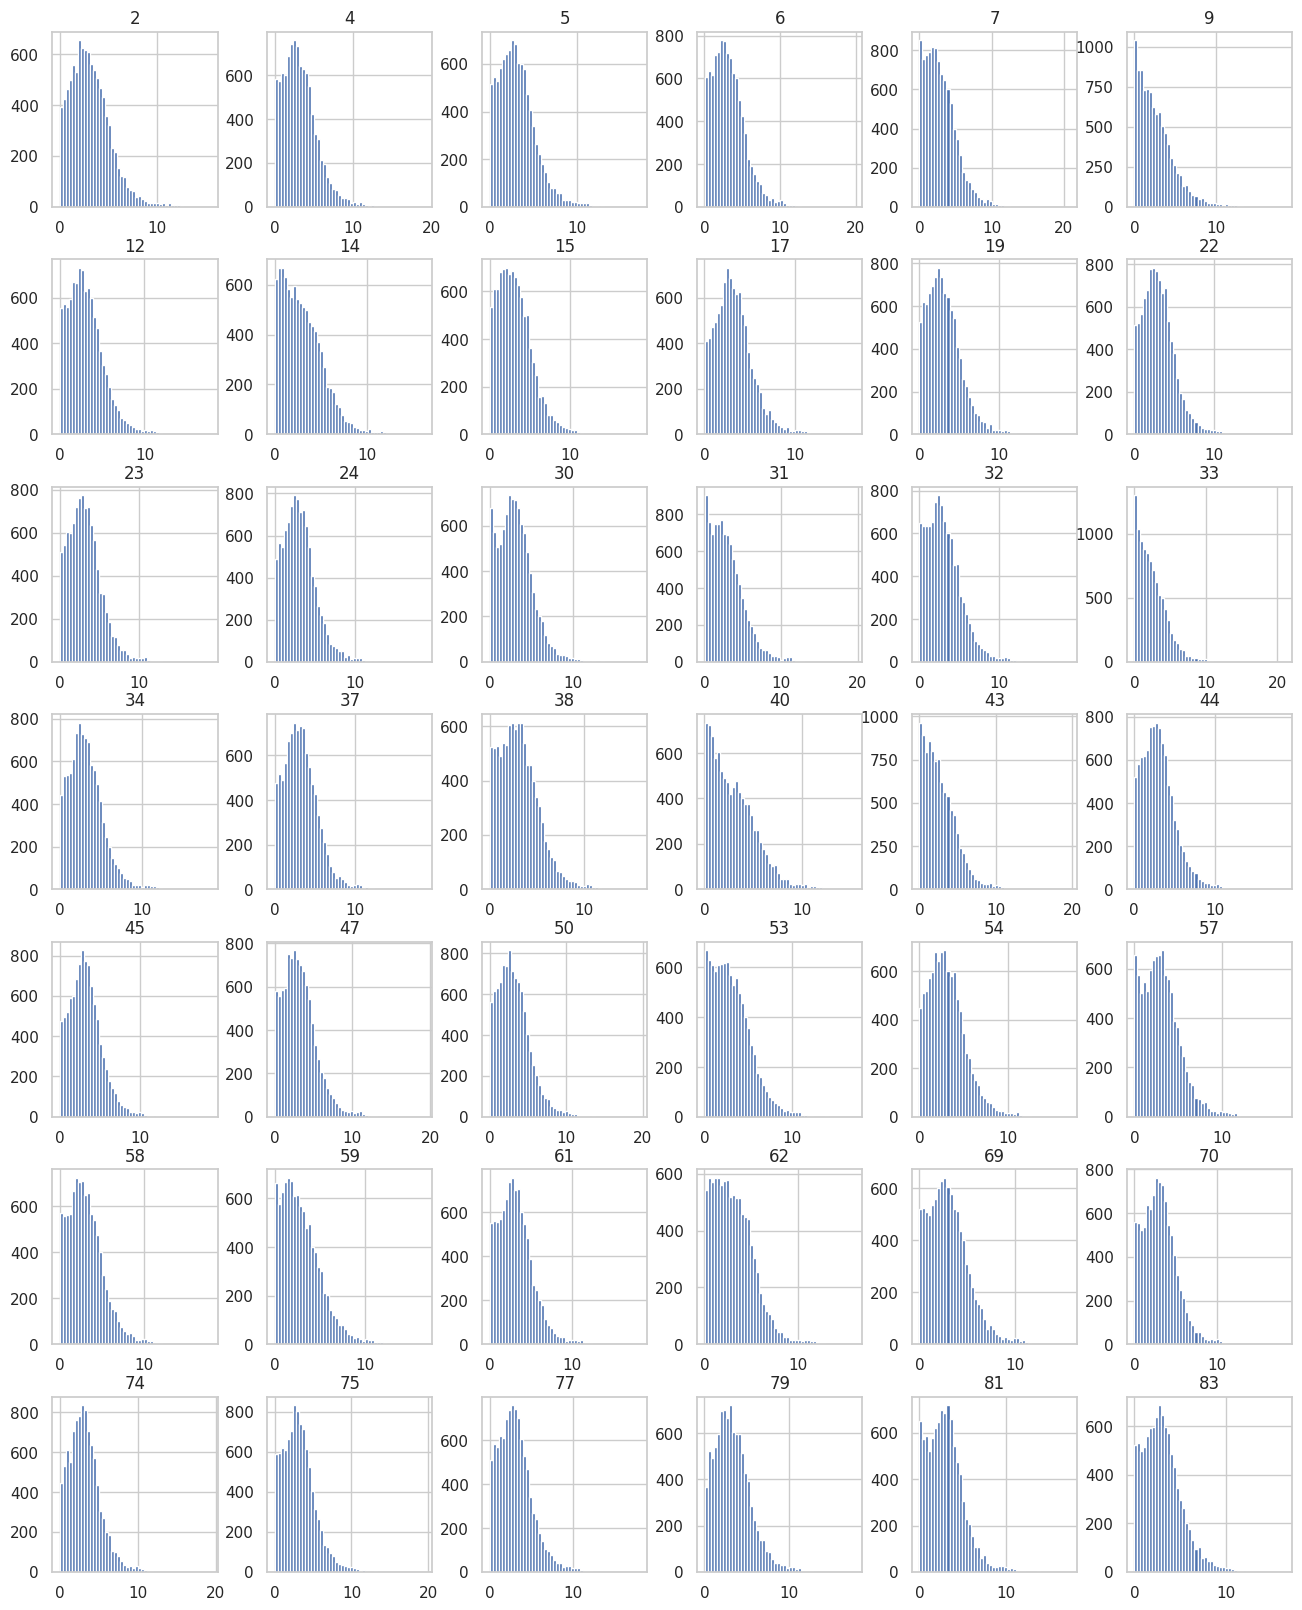

In [ ]:
log_counts.hist(figsize=(16, 20), bins=50)
plt.show()

In [ ]:
df=log_counts

In [ ]:
df

2         4         5         6         7         9         12  \
3      2.812806  3.166301  2.510195  2.841740  3.684594  2.955045  3.165661   
5      4.062035  4.370569  4.385645  4.466347  5.421567  4.559541  5.353147   
10     1.010744  1.531698  3.308699  1.008982  1.126768  2.689344  3.100216   
15     5.585035  2.713848  2.608365  2.191070  4.108165  1.983415  3.099613   
17     3.543224  4.284166  4.306525  3.965480  3.999892  4.205854  4.197960   
...         ...       ...       ...       ...       ...       ...       ...   
62782  2.440293  1.401827  1.686940  2.951325  2.628662  1.067116  1.752398   
62826  1.065614  0.253217  1.215430  0.322616  1.201013  0.117294  0.386714   
62829  3.011458  0.711301  1.020307  0.741310  0.623384  0.787070  1.130944   
62839  0.687744  0.391272  0.381813  0.170106  0.244780  0.055855  0.342959   
62851  0.457677  0.242416  0.512972  0.276150  0.421534  0.171765  0.754994   

             14        15        17  ...        61        62        69  \
3      4.226532  2.717044  3.132814  ...  2.441829  4.073143  2.839125   
5      3.945879  4.226747  4.986529  ...  5.609309  3.807726  4.486901   
10     2.119001  1.484185  2.640707  ...  2.740956  1.395545  2.721887   
15     2.821961  1.625224  2.144885  ...  1.896977  1.442790  2.565149   
17     4.959914  3.928058  4.271030  ...  4.111415  4.944638  4.284470   
...         ...       ...       ...  ...       ...       ...       ...   
62782  0.645352  1.667933  2.090322  ...  2.509138  2.087504  1.925825   
62826  0.556152  0.982690  0.724532  ...  0.385925  1.401685  0.919200   
62829  0.338547  0.936573  1.809167  ...  1.603986  0.491884  2.165317   
62839  0.641718  0.336620  0.817964  ...  0.158886  0.349147  0.497220   
62851  0.737031  0.375654  0.883631  ...  0.408766  0.344651  0.398423   

             70        74        75        77        79        81        83  
3      1.867825  3.092360  3.290231  2.633594  3.846604  3.234648  3.564671  
5      4.739805  5.020871  5.040200  4.805741  4.708491  5.093721  5.227063  
10     2.721764  3.730890  3.090330  2.961960  2.453389  2.725876  4.892702  
15     1.961564  1.656153  2.305028  2.951498  3.845189  1.362969  6.090419  
17     4.432979  4.461902  4.662764  4.810890  4.198863  4.202143  4.303072  
...         ...       ...       ...       ...       ...       ...       ...  
62782  2.753371  3.081205  2.172235  2.078197  2.433988  2.406572  1.746816  
62826  0.546995  1.087795  0.757741  0.462684  1.361516  0.689864  0.576361  
62829  2.234468  2.147450  1.353589  1.582166  0.873794  2.087707  2.401680  
62839  0.680234  0.719759  0.265132  0.536153  0.454309  0.914018  0.442676  
62851  0.628704  0.463606  0.634655  0.481172  0.400888  0.647513  0.527945  

[9867 rows x 42 columns]

<ipython-input-21-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-21-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-21-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-21-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-21-2b

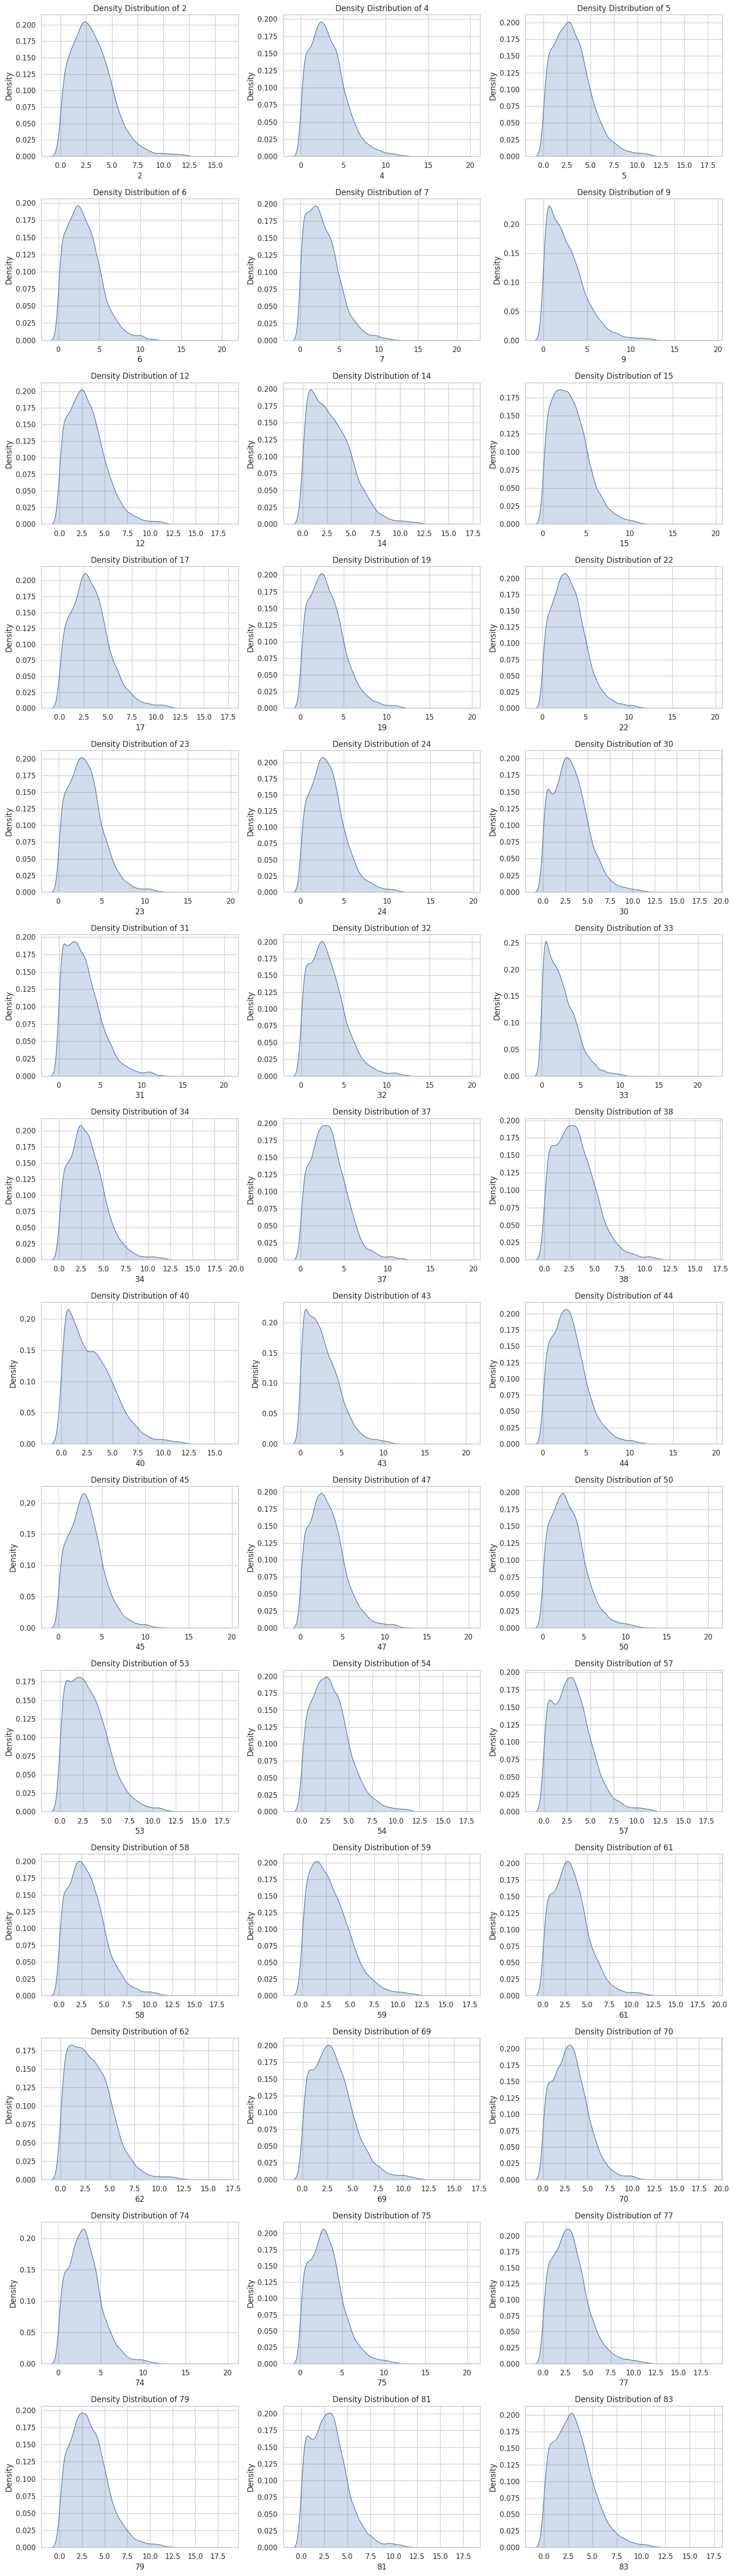

In [ ]:
# Assuming you have a DataFrame named 'df'

# Create a figure with subplots
n_cols = df.select_dtypes(include=['number']).shape[1]  # Number of numerical columns
n_rows = (n_cols + 2) // 3  # Number of rows needed for subplots

fig, axs = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
axs = axs.ravel()  # Flatten the axs array

# Plot the density distribution for each numerical column
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
    axs[i].set_title(f'Density Distribution of {col}')

# Remove unused subplots if any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

<ipython-input-20-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-20-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-20-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-20-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(

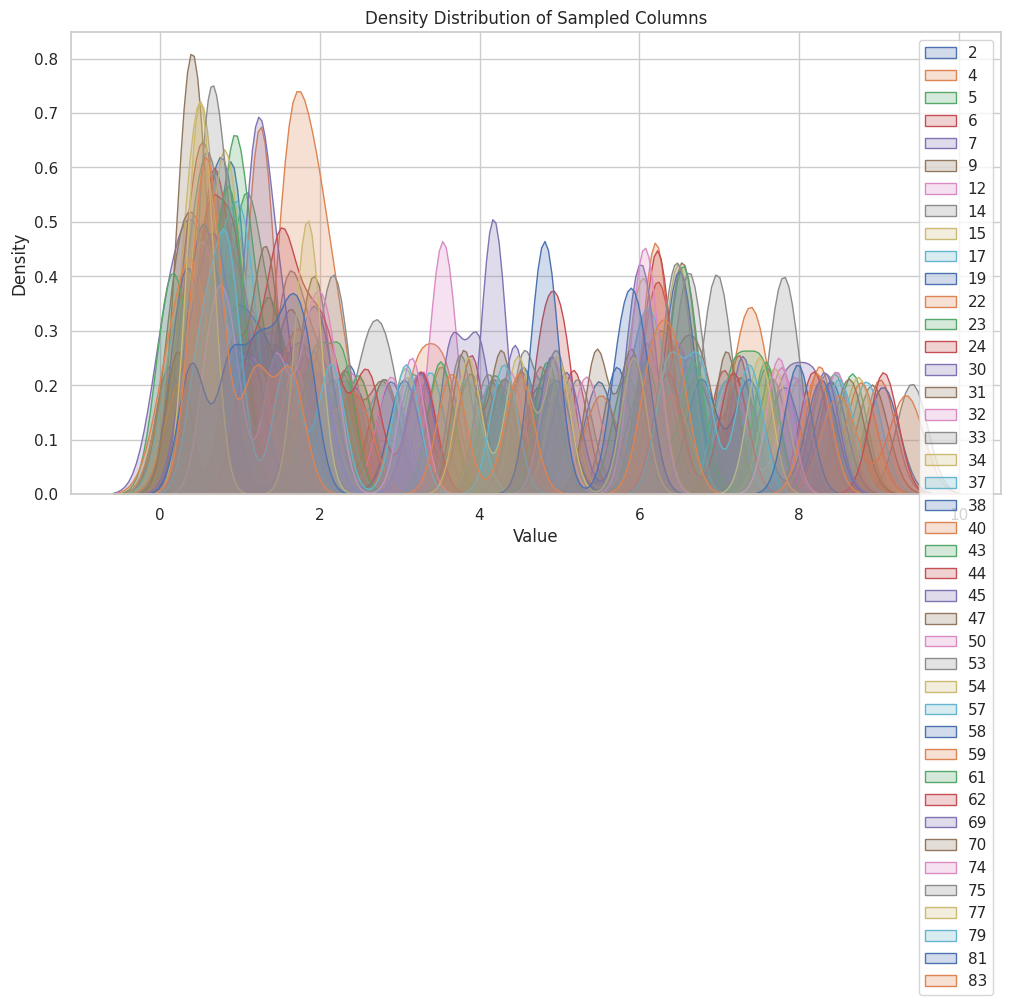

In [ ]:
# Sample 1000 rows from the DataFrame
sample_df = df.sample(n=10, random_state=42)

# Iterate over each column in the sampled DataFrame and plot its density distribution
plt.figure(figsize=(12, 6))  # Set the figure size

for column in sample_df.columns:
    sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)

plt.xlabel('Value')  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label
plt.title('Density Distribution of Sampled Columns')  # Set the title
plt.legend()  # Show legend with column names
plt.show()  # Show the plot

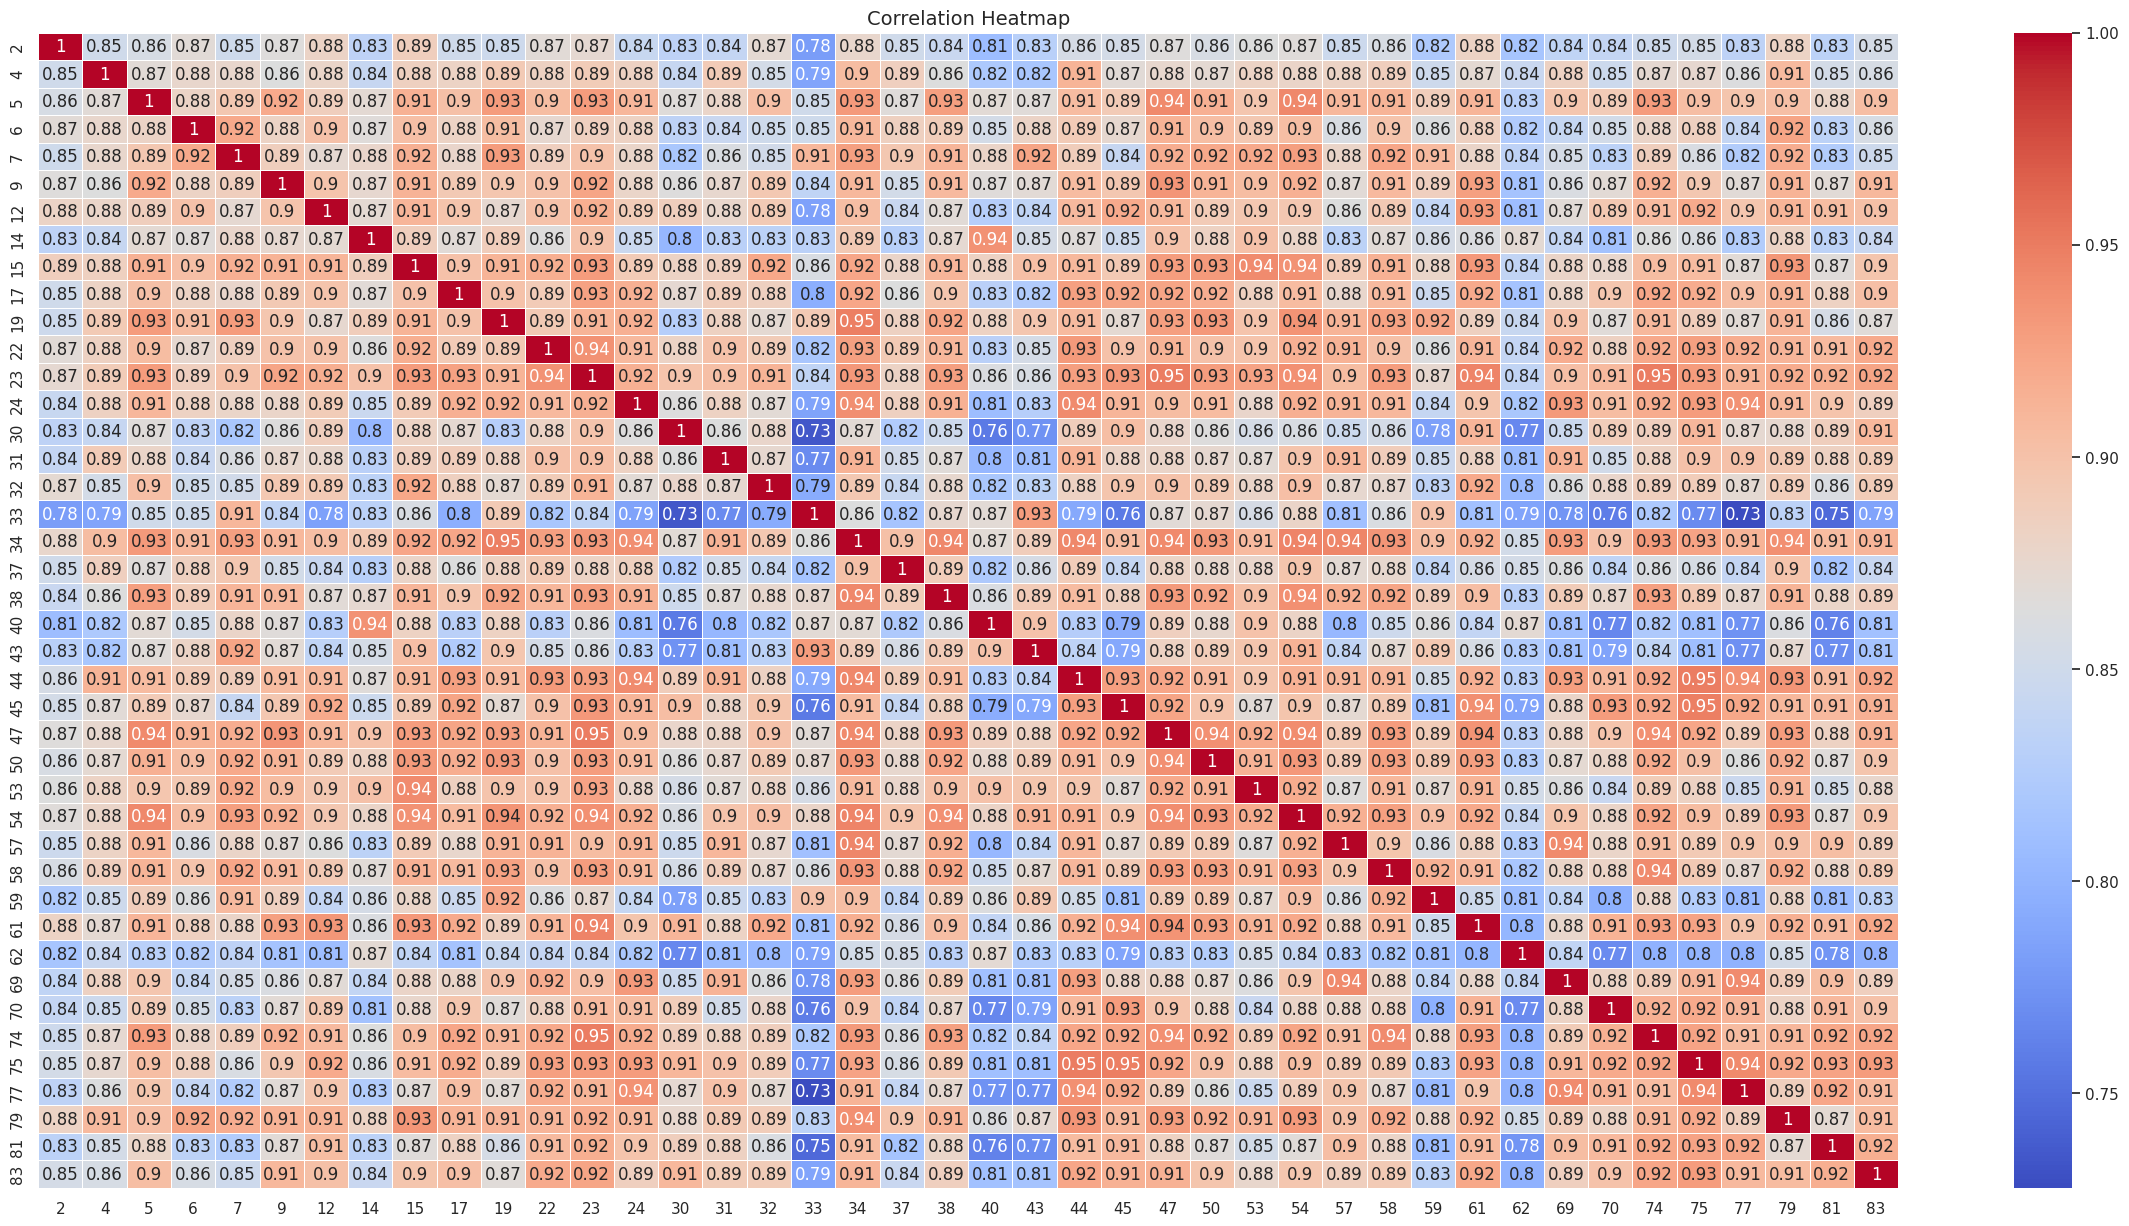

In [ ]:
# Create correlation matrix
corr = df.corr()

# Generate heatmap
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            linewidths=0.5,
            ax=ax)

# Set title
ax.set_title('Correlation Heatmap',
              fontsize=14)

# Show plot
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# from scipy.stats import spearmanr

# rna_data=df
# # Calculate Spearman correlation matrix
# spearman_corr_matrix = rna_data.corr(method='spearman')

# # Set up the pairplot with hexagonal representation and boxplots
# g = sns.pairplot(rna_data, kind='hex')

# # Loop through the axes of the pairplot and add Spearman correlation coefficient and boxplots
# for i, (ax_row, ax_col) in enumerate(zip(g.axes, g.axes.T)):
#     for j, ax in enumerate(ax_row):
#         if i != j:
#             # Calculate Spearman correlation coefficient
#             x = rna_data.iloc[:, i]
#             y = rna_data.iloc[:, j]
#             spearman_corr, _ = spearmanr(x, y)

#             # Add Spearman correlation coefficient to the plot
#             ax.annotate(f"Spearman corr: {spearman_corr:.2f}", xy=(0.5, 0.9), xycoords='axes fraction', ha='center')
#         else:
#             # Add boxplot to the diagonal elements
#             sns.boxplot(data=rna_data.iloc[:, i], ax=ax, orient="v")

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


In [ ]:
data=df

In [ ]:
data

2         4         5         6         7         9         12  \
3      2.812806  3.166301  2.510195  2.841740  3.684594  2.955045  3.165661   
5      4.062035  4.370569  4.385645  4.466347  5.421567  4.559541  5.353147   
10     1.010744  1.531698  3.308699  1.008982  1.126768  2.689344  3.100216   
15     5.585035  2.713848  2.608365  2.191070  4.108165  1.983415  3.099613   
17     3.543224  4.284166  4.306525  3.965480  3.999892  4.205854  4.197960   
...         ...       ...       ...       ...       ...       ...       ...   
62782  2.440293  1.401827  1.686940  2.951325  2.628662  1.067116  1.752398   
62826  1.065614  0.253217  1.215430  0.322616  1.201013  0.117294  0.386714   
62829  3.011458  0.711301  1.020307  0.741310  0.623384  0.787070  1.130944   
62839  0.687744  0.391272  0.381813  0.170106  0.244780  0.055855  0.342959   
62851  0.457677  0.242416  0.512972  0.276150  0.421534  0.171765  0.754994   

             14        15        17  ...        61        62        69  \
3      4.226532  2.717044  3.132814  ...  2.441829  4.073143  2.839125   
5      3.945879  4.226747  4.986529  ...  5.609309  3.807726  4.486901   
10     2.119001  1.484185  2.640707  ...  2.740956  1.395545  2.721887   
15     2.821961  1.625224  2.144885  ...  1.896977  1.442790  2.565149   
17     4.959914  3.928058  4.271030  ...  4.111415  4.944638  4.284470   
...         ...       ...       ...  ...       ...       ...       ...   
62782  0.645352  1.667933  2.090322  ...  2.509138  2.087504  1.925825   
62826  0.556152  0.982690  0.724532  ...  0.385925  1.401685  0.919200   
62829  0.338547  0.936573  1.809167  ...  1.603986  0.491884  2.165317   
62839  0.641718  0.336620  0.817964  ...  0.158886  0.349147  0.497220   
62851  0.737031  0.375654  0.883631  ...  0.408766  0.344651  0.398423   

             70        74        75        77        79        81        83  
3      1.867825  3.092360  3.290231  2.633594  3.846604  3.234648  3.564671  
5      4.739805  5.020871  5.040200  4.805741  4.708491  5.093721  5.227063  
10     2.721764  3.730890  3.090330  2.961960  2.453389  2.725876  4.892702  
15     1.961564  1.656153  2.305028  2.951498  3.845189  1.362969  6.090419  
17     4.432979  4.461902  4.662764  4.810890  4.198863  4.202143  4.303072  
...         ...       ...       ...       ...       ...       ...       ...  
62782  2.753371  3.081205  2.172235  2.078197  2.433988  2.406572  1.746816  
62826  0.546995  1.087795  0.757741  0.462684  1.361516  0.689864  0.576361  
62829  2.234468  2.147450  1.353589  1.582166  0.873794  2.087707  2.401680  
62839  0.680234  0.719759  0.265132  0.536153  0.454309  0.914018  0.442676  
62851  0.628704  0.463606  0.634655  0.481172  0.400888  0.647513  0.527945  

[9867 rows x 42 columns]

In [ ]:
import pandas as pd
import numpy as np

def median_normalize(data):
  """
  This function performs median normalization on a pandas DataFrame.

  Args:
      data: A pandas DataFrame containing the data to be normalized.

  Returns:
      A pandas DataFrame with features normalized using median and standard deviation.

  Handles potential issues:
      - Constant columns: Identifies and removes them before normalization.
      - Division by zero: Adds a small constant (epsilon) to the standard deviation to avoid it.
      - Missing values (NaNs): Offers two options:
          - Imputation: Fills NaNs with the median before normalization (default).
          - Explicit handling: Allows keeping NaNs by setting the `fill_value` argument to 'nan'.
  """

  # Check for constant columns (all values identical)
  constant_cols = data.std(axis=0) == 0
  if np.any(constant_cols):
    print("Warning: Removing constant columns before normalization.")
    data = data.iloc[:, ~constant_cols]  # Remove constant columns

  # Choose between imputation (default) or interpolation (optional)
  # For imputation (filling NaNs with median):
  # median_fill = np.nanmedian(data, axis=0).tolist()  # Option 1: Convert median to list
  # data = data.fillna(median_fill)

  # For interpolation (linear interpolation, replace with preferred method if applicable)
  data = data.interpolate('linear', axis=0)  # Option 2: Interpolation

  # Normalize data using NumPy for efficiency
  normalized_data = (data.values - np.nanmedian(data, axis=0)) / np.maximum(np.nanstd(data, axis=0), 1e-8)

  # Return the normalized DataFrame
  return pd.DataFrame(normalized_data, columns=data.columns)

# Example usage:
normalized_data = median_normalize(data.copy())  # Operate on a copy to avoid modifying original data

# You can now use the normalized_data for further analysis or training

In [ ]:
normalized_data

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

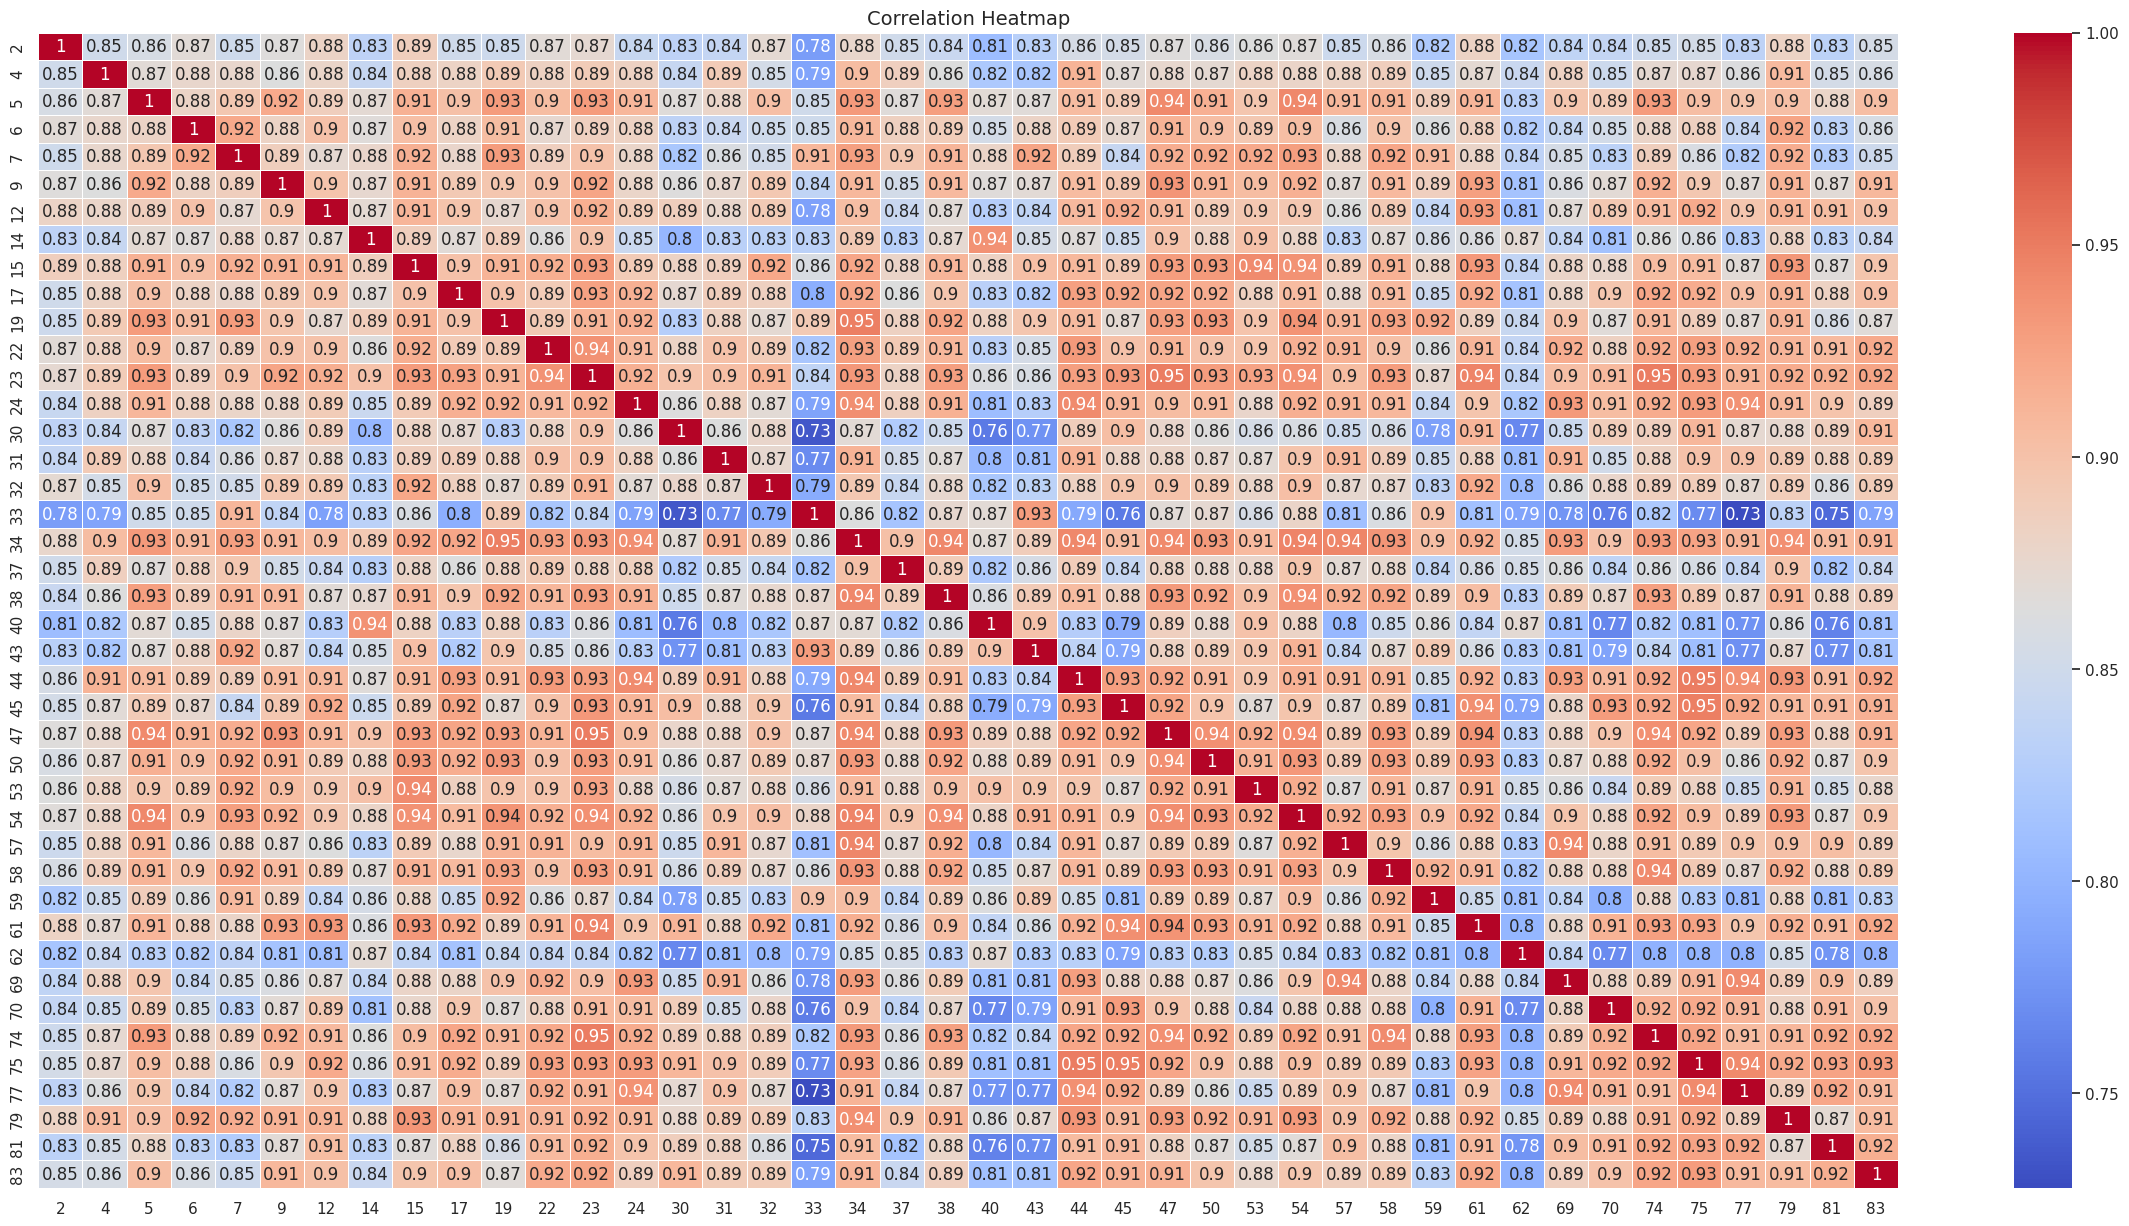

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman's correlation matrix
correlation_matrix = normalized_data.corr(method='spearman')

# Generate heatmap
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            linewidths=0.5,
            ax=ax)

# Set title
ax.set_title('Correlation Heatmap',
              fontsize=14)

# Show plot
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

data = normalized_data

# Perform Median-MAD scaling using RobustScaler from sklearn
scaler = RobustScaler(with_centering=False)
scaled_data = scaler.fit_transform(data)

# Convert the scaled data back to a pandas DataFrame
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)

In [ ]:
data

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

<ipython-input-32-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-32-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-32-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-32-2bc5a5ae9052>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
<ipython-input-32-2b

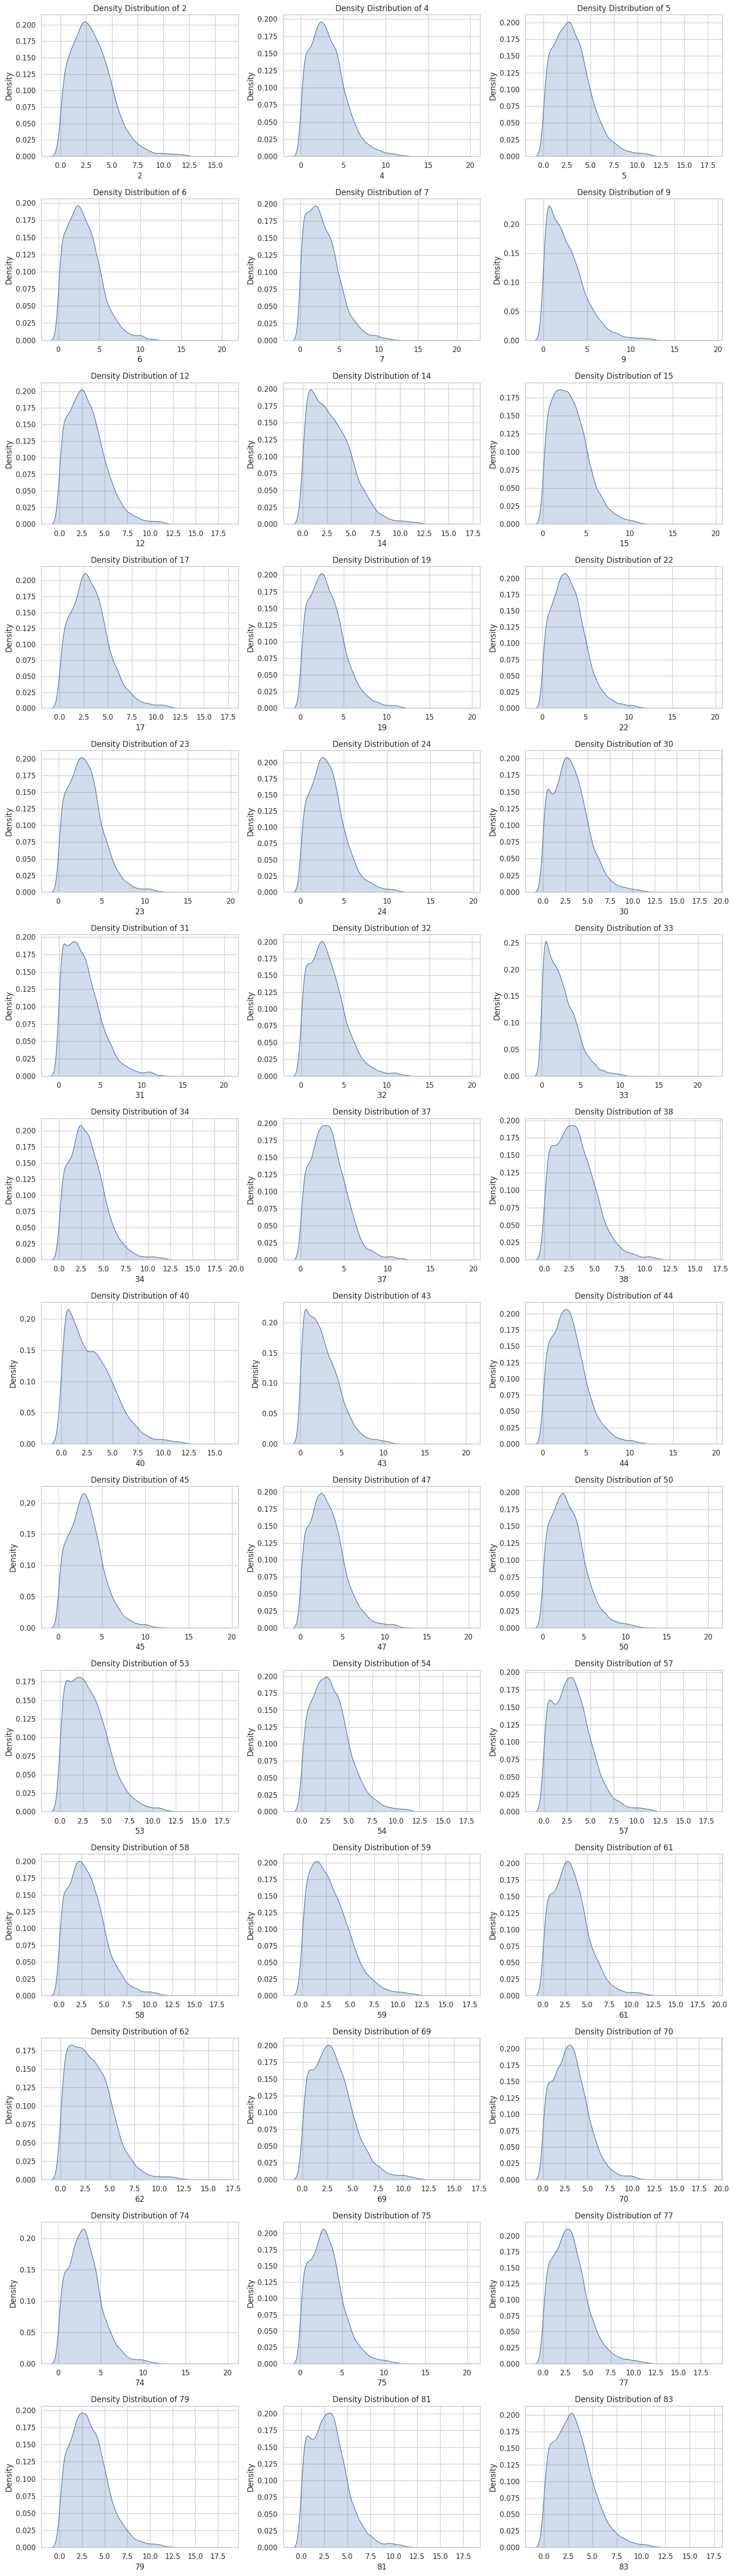

In [ ]:
# Assuming you have a DataFrame named 'df'

# Create a figure with subplots
n_cols = df.select_dtypes(include=['number']).shape[1]  # Number of numerical columns
n_rows = (n_cols + 2) // 3  # Number of rows needed for subplots

fig, axs = plt.subplots(n_rows, 3, figsize=(16, 4 * n_rows))
axs = axs.ravel()  # Flatten the axs array

# Plot the density distribution for each numerical column
for i, col in enumerate(df.select_dtypes(include=['number']).columns):
    sns.kdeplot(data=df, x=col, ax=axs[i], shade=True)
    axs[i].set_title(f'Density Distribution of {col}')

# Remove unused subplots if any
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

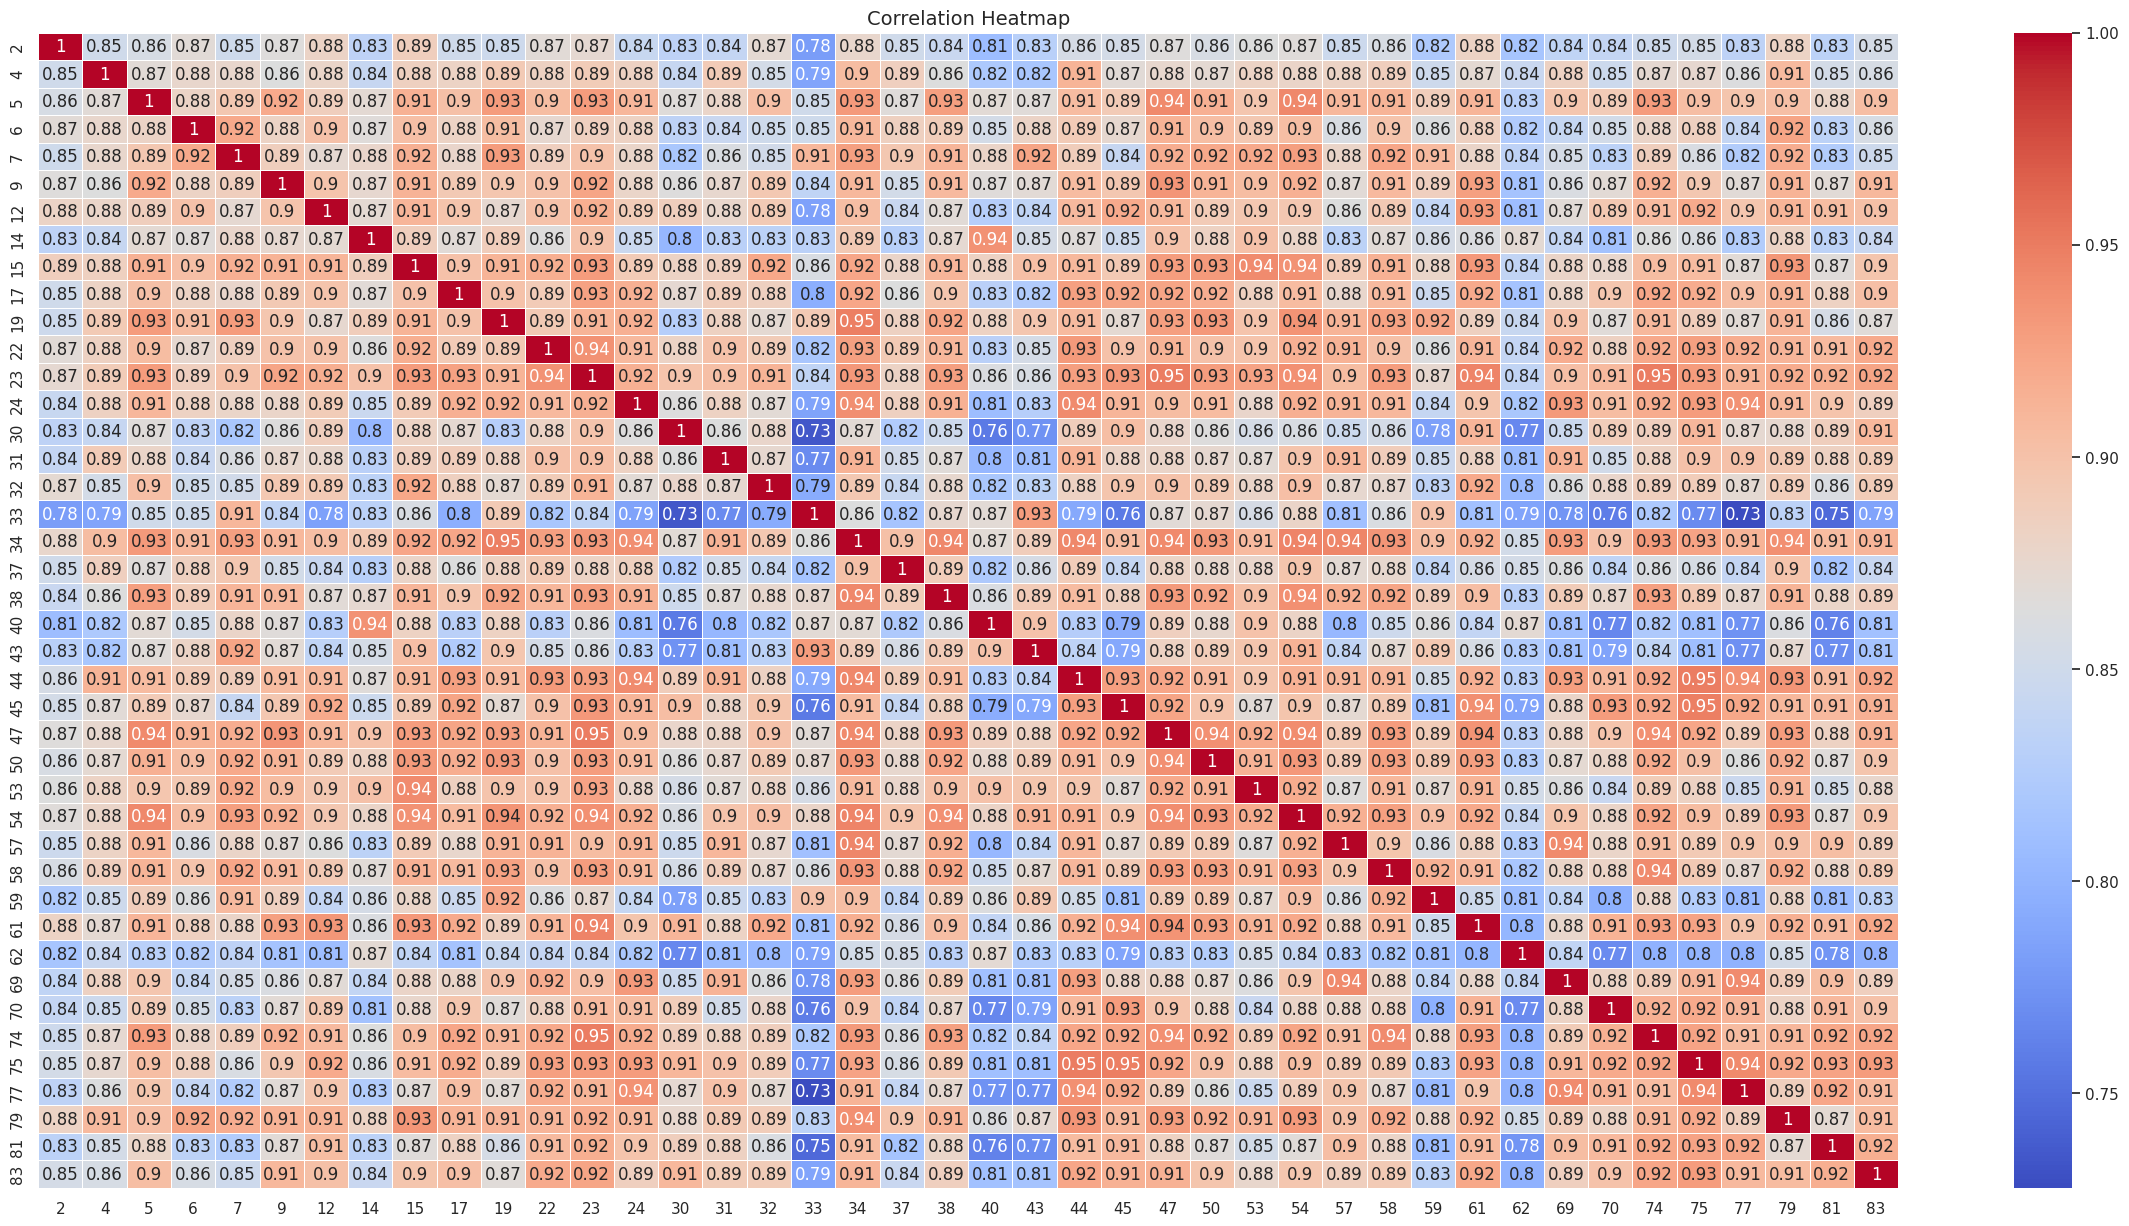

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman's correlation matrix
correlation_matrix = normalized_data.corr(method='spearman')

# Generate heatmap
fig, ax = plt.subplots(figsize=(30,15))
sns.heatmap(corr,
            cmap='coolwarm',
            annot=True,
            linewidths=0.5,
            ax=ax)

# Set title
ax.set_title('Correlation Heatmap',
              fontsize=14)

# Show plot
plt.show()

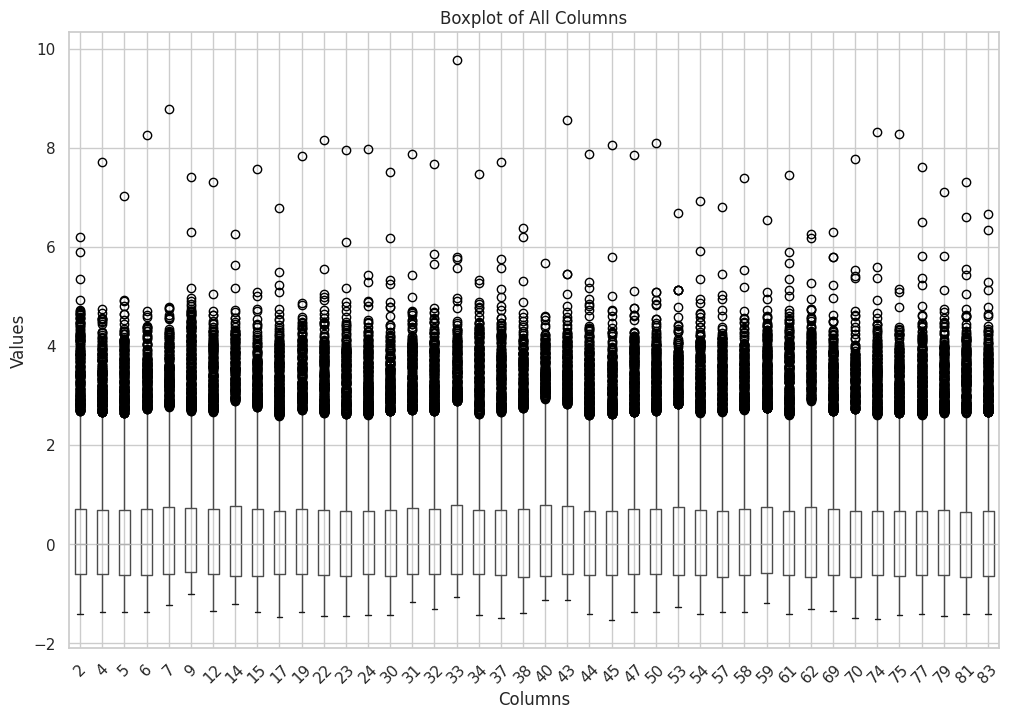

In [ ]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the boxplot for all columns in the DataFrame
data.boxplot(ax=ax)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a title and axis labels
plt.title('Boxplot of All Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Display the plot
plt.show()

<ipython-input-36-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-36-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-36-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)
<ipython-input-36-b461ef2903ad>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(

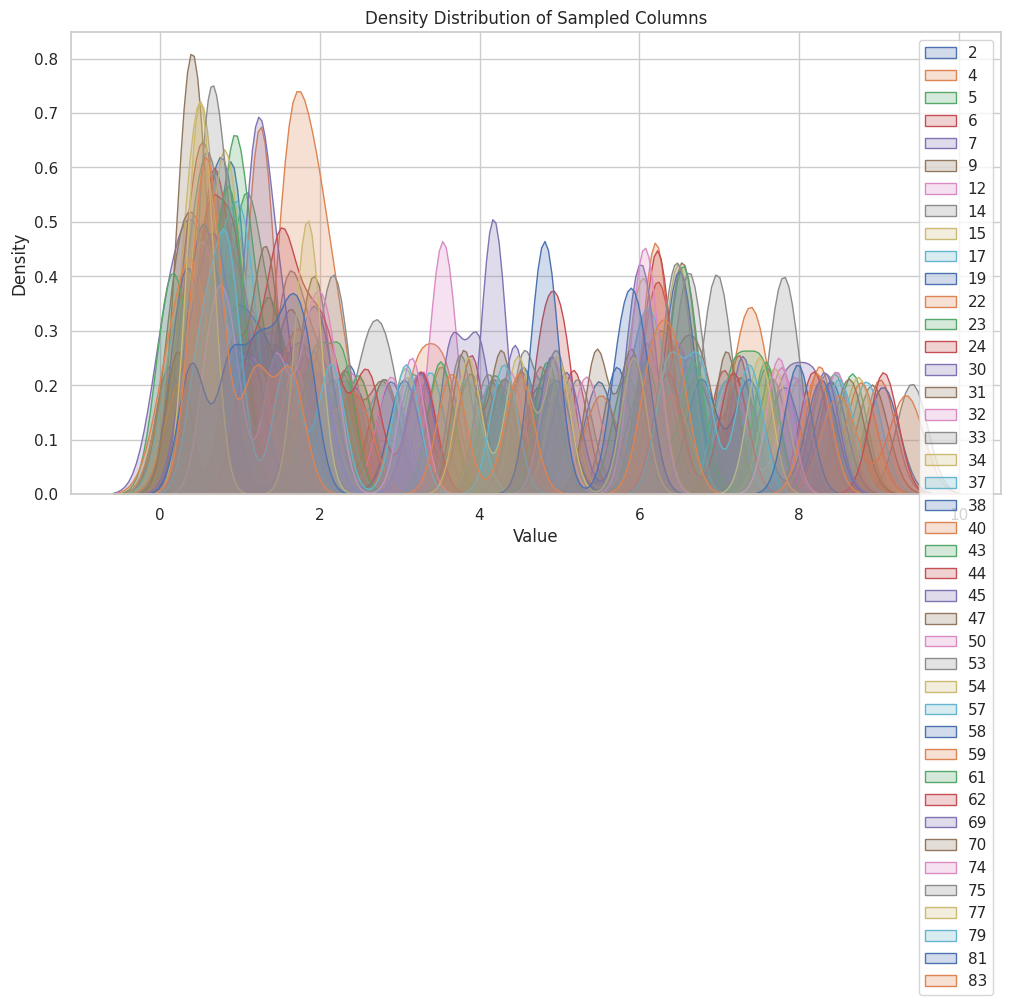

In [ ]:
# Sample 1000 rows from the DataFrame
sample_df = df.sample(n=10, random_state=42)

# Iterate over each column in the sampled DataFrame and plot its density distribution
plt.figure(figsize=(12, 6))  # Set the figure size

for column in sample_df.columns:
    sns.kdeplot(sample_df[column], label=column, shade=True, bw_adjust=0.1)

plt.xlabel('Value')  # Set the x-axis label
plt.ylabel('Density')  # Set the y-axis label
plt.title('Density Distribution of Sampled Columns')  # Set the title
plt.legend()  # Show legend with column names
plt.show()  # Show the plot

In [ ]:
df=normalized_data

In [ ]:
df

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

In [ ]:
data

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

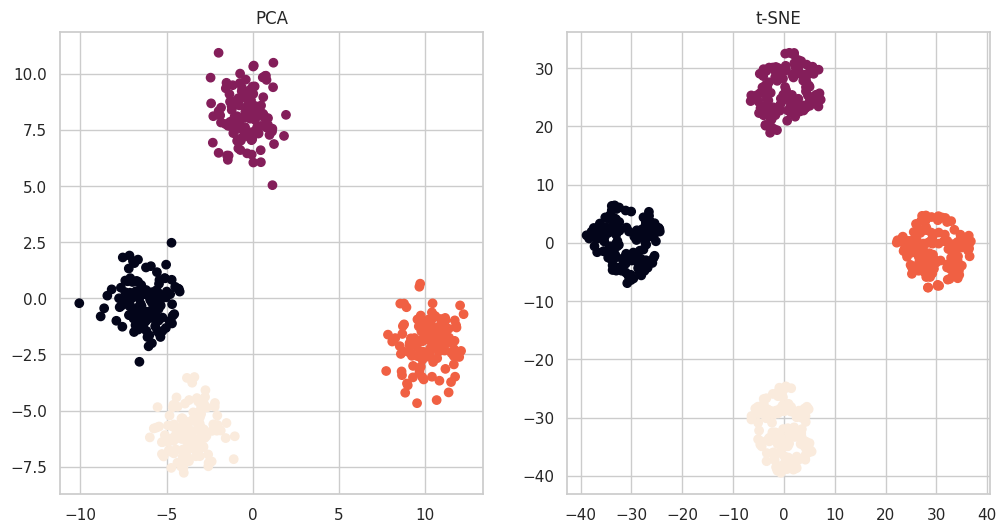

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
X, y = make_blobs(n_samples=500, centers=4, random_state=42)

# Perform PCA on the data
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(X)

# Perform t-SNE on the data
tsne = TSNE(n_components=2, random_state=0)
reduced_data_tsne = tsne.fit_transform(X)

# Visualize the reduced data
plt.figure(figsize=(12, 6))

# Plot the PCA reduced data
plt.subplot(121)
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c=y)
plt.title('PCA')

# Plot the t-SNE reduced data
plt.subplot(122)
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=y)
plt.title('t-SNE')

plt.show()

In [ ]:
data

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

In [ ]:
# Take the transpose of the data
transposed_data = data.T

# Set the path to save the file on Google Drive
save_path = '/content/drive/MyDrive/transposed_data.csv'  # Adjust the path as needed

# Save the transposed data to Google Drive
transposed_data.to_csv(save_path, index=True, header=True)

In [ ]:
import numpy as np  # for NumPy arrays (optional)
import csv

# Assuming your data is in a variable called 'data'

# Check data type (optional, helpful for error handling)
if isinstance(data, np.ndarray):
  print("Data is a NumPy array.")
else:
  print("Data is not a NumPy array. Assuming a list of lists or 2D array structure.")

# Transpose the data
try:
  # Attempt NumPy transpose for arrays
  if isinstance(data, np.ndarray):
    transposed_data = np.transpose(data)
  else:
    # Transpose using list comprehension for other data structures
    transposed_data = [[row[i] for row in data] for i in range(len(data[0]))]
except IndexError:
  # Handle potential errors like empty data
  print("Error: Data seems empty or has incompatible structure for transposition.")
  transposed_data = []  # Set to an empty list in case of errors

# Save the transposed data as CSV
try:
  with open("transposed_data.csv", "w", newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(transposed_data)
  print("Transposed data saved successfully as 'transposed_data.csv'.")
except OSError:
  print("Error: Could not save the CSV file. Check for permission issues.")

# Note: The saved file resides in your Colab runtime, not on Google Drive.

Data is not a NumPy array. Assuming a list of lists or 2D array structure.


KeyError: 0

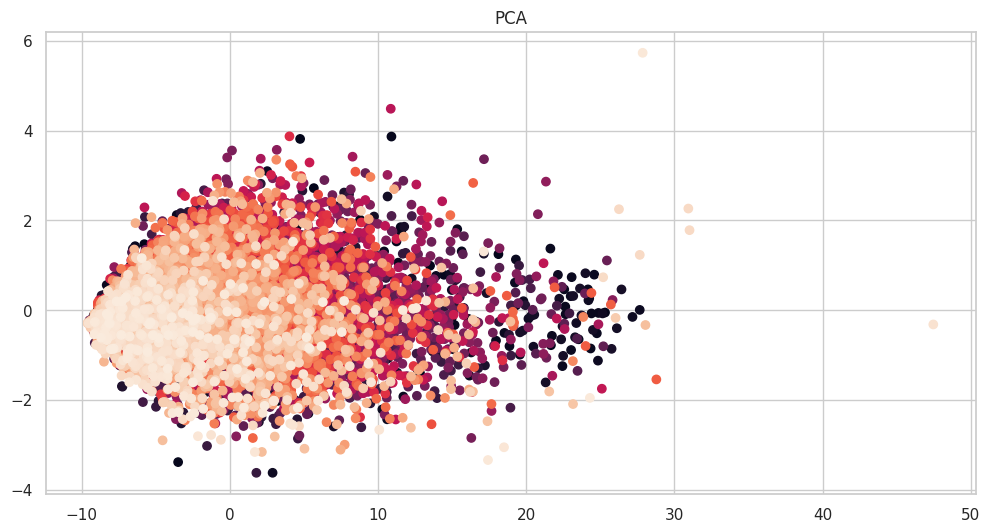

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA on the data
reducer = PCA(n_components=2)
reduced_data = reducer.fit_transform(data)

# Convert the reduced data back to a pandas DataFrame
reduced_data_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

# Visualize the reduced data
plt.figure(figsize=(12, 6))
plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], c=reduced_data_df.index)
plt.title('PCA')
plt.show()

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=62edec20b18061e08a71c20396b05b62f83d2dfda6678cb8bd1d1caed45bc595
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


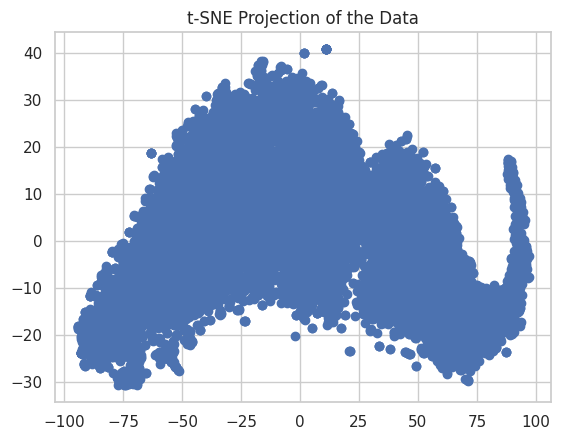

In [ ]:
from sklearn.manifold import TSNE

# Assuming you have your data in a NumPy array called 'data'

# 1. Create a t-SNE transformer object
tsne_transformer = TSNE(n_components=2, perplexity=30)  # Adjust parameters as needed

# 2. Fit the transformer to your data (learn the embedding)
embedding = tsne_transformer.fit_transform(data)

# 3. Now 'embedding' is a 2D representation of your data
# You can use 'embedding' for further analysis or visualization techniques

# Example usage with visualization (using matplotlib)
import matplotlib.pyplot as plt

plt.scatter(embedding[:, 0], embedding[:, 1])  # Assuming 2D embedding
plt.title("t-SNE Projection of the Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


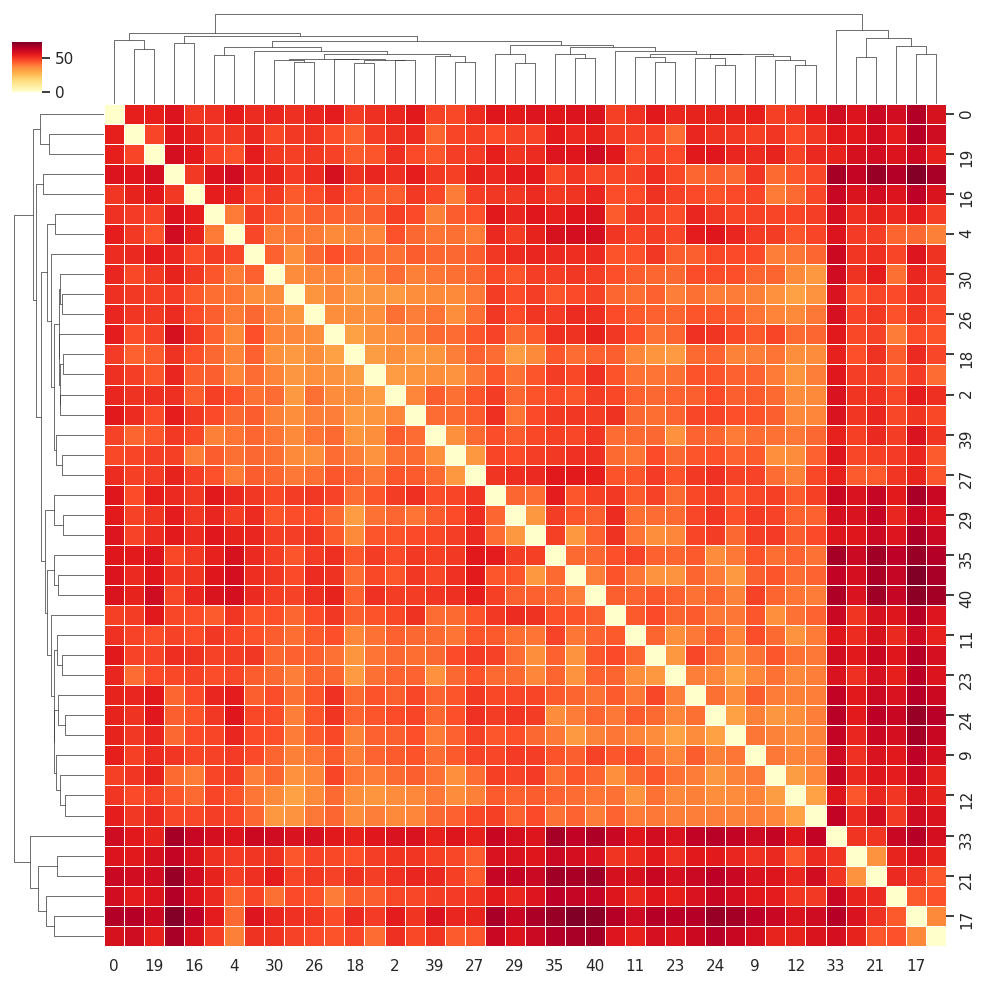

In [ ]:
# Calculate pairwise Euclidean distances between samples
sample_dist = squareform(pdist(data.T, metric='euclidean'))

# Create a clustered heatmap with Seaborn
sns.clustermap(sample_dist, cmap="YlOrRd", linewidths=.5, figsize=(10, 10),
               row_cluster=True, col_cluster=True,
               dendrogram_ratio=(0.1, 0.1),
               cbar_pos=(0.02, 0.9, 0.03, 0.05))

# Display the plot
plt.show()

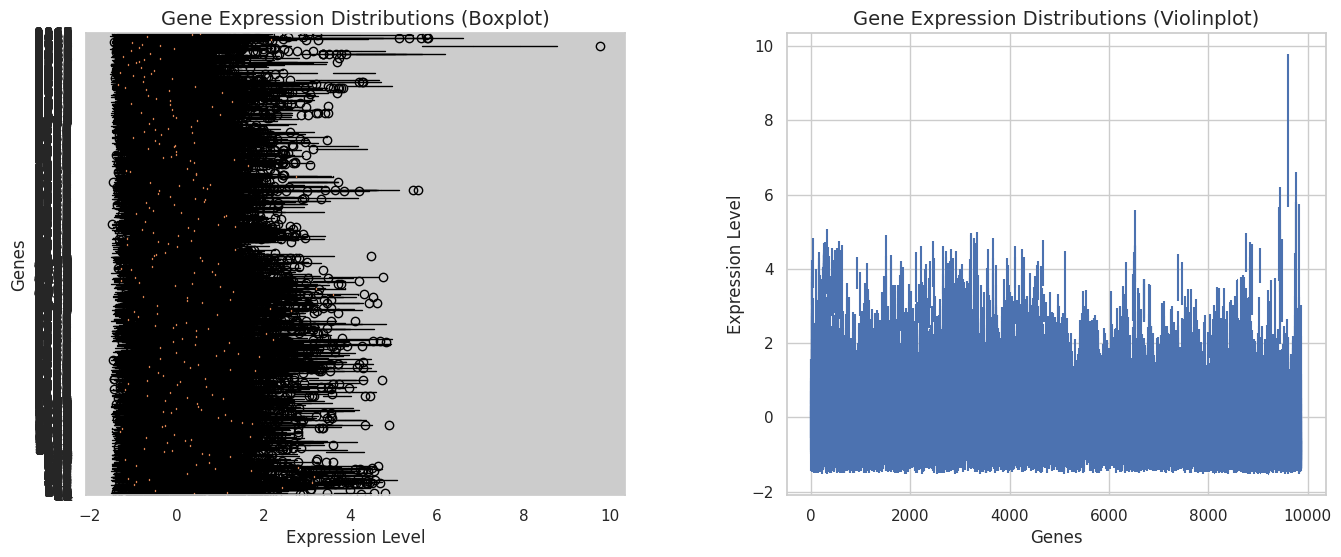

In [ ]:

# Create a figure and axis objects
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Boxplot
ax1.boxplot(data.T, vert=False, patch_artist=True)
ax1.set_title("Gene Expression Distributions (Boxplot)", fontsize=14)
ax1.set_xlabel("Expression Level", fontsize=12)
ax1.set_ylabel("Genes", fontsize=12)

# Violinplot
ax2.violinplot(data.T, vert=True)
ax2.set_title("Gene Expression Distributions (Violinplot)", fontsize=14)
ax2.set_xlabel("Genes", fontsize=12)
ax2.set_ylabel("Expression Level", fontsize=12)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

In [ ]:
# Identify highly variable genes
gene_variances = data.var(axis=1)
top_variable_genes = gene_variances.sort_values(ascending=False).head(1000).index

pca = PCA(n_components=10)
pca_data = pca.fit_transform(data.loc[top_variable_genes])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter


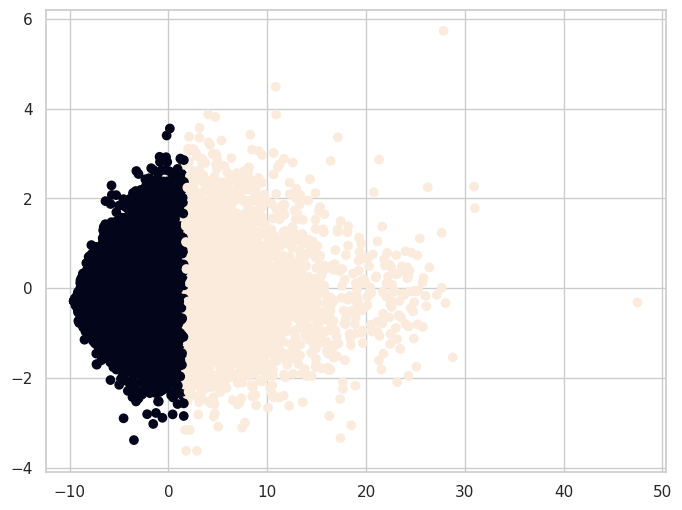

In [ ]:
# Sample clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.show()

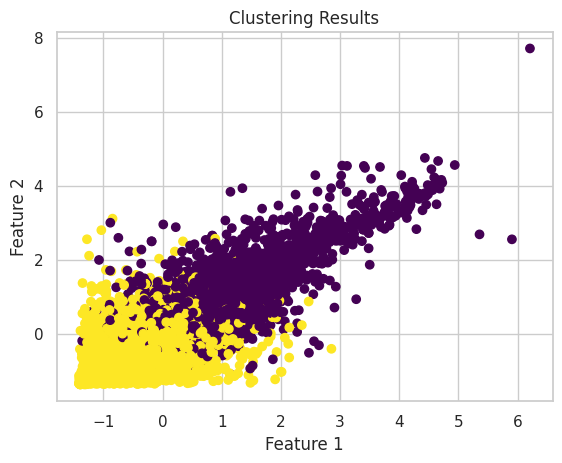

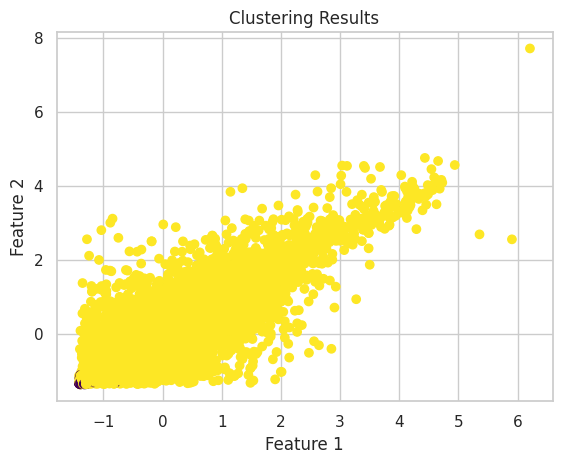

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, DBSCAN


def perform_clustering(data, clustering_method, n_clusters=None, eps=None, min_samples=None):
  """
  This function performs clustering on the given data using the specified method.

  Args:
      data: A pandas DataFrame or NumPy array containing the data to be clustered.
      clustering_method: A string indicating the clustering method ('agglomerative' or 'dbscan').
      n_clusters: (Optional) The number of clusters for Agglomerative Clustering.
      eps: (Optional) The epsilon parameter for DBSCAN.
      min_samples: (Optional) The minimum samples parameter for DBSCAN.

  Returns:
      A list of cluster labels for each data point.
  """

  if clustering_method == 'agglomerative':
    if n_clusters is None:
      raise ValueError("Please specify the number of clusters for agglomerative clustering.")
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    return agglom.fit_predict(data)
  elif clustering_method == 'dbscan':
    if eps is None or min_samples is None:
      raise ValueError("Please specify eps and min_samples for DBSCAN.")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    return dbscan.fit_predict(data)
  else:
    raise ValueError("Invalid clustering method specified.")


def plot_clusters(data, cluster_labels):
  """
  This function plots the clustering results using a scatter plot.

  Args:
      data: A pandas DataFrame or NumPy array containing the data.
      cluster_labels: A list of cluster labels for each data point.
  """

  # Choose colors for each cluster (optional)
  colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(cluster_labels))))

  # Scatter plot based on data features (assuming data has two features)
  plt.scatter(data[:, 0], data[:, 1], c=colors[cluster_labels])  # Adjust for feature indices

  # Label axes and add a title
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Clustering Results")

  # Show the plot
  plt.show()


# Assuming you have your data in a pandas DataFrame called 'data'

# Example usage with Agglomerative Clustering (replace with desired method and parameters)
try:
  agglom_labels = perform_clustering(data, 'agglomerative', n_clusters=2)
  plot_clusters(data.values, agglom_labels)  # Convert DataFrame to NumPy array for plotting
except ValueError as e:
  print(e)

# Example usage with DBSCAN (replace with desired method and parameters)
try:
  dbscan_labels = perform_clustering(data, 'dbscan', eps=0.5, min_samples=5)
  plot_clusters(data.values, dbscan_labels)
except ValueError as e:
  print(e)


In [ ]:
# Create a sample_info DataFrame
sample_ids = df.columns[1:]  # Get sample IDs from column names
conditions = ['Control'] * 7 + ['Treatment'] * (len(sample_ids) - 7)  # Assign conditions based on your knowledge
sample_info = pd.DataFrame({'Sample ID': sample_ids, 'Condition': conditions})

# Set the path to save the file on Google Drive
save_path = '/content/drive/MyDrive/sample_info.csv'  # Adjust the path as needed

# Save the sample_info DataFrame as a CSV file
sample_info.to_csv(save_path, index=True, header=True)

print("sample_info.csv has been created successfully.")

sample_info.csv has been created successfully.


In [ ]:
sample_info

Sample ID  Condition
0          4    Control
1          5    Control
2          6    Control
3          7    Control
4          9    Control
5         12    Control
6         14    Control
7         15  Treatment
8         17  Treatment
9         19  Treatment
10        22  Treatment
11        23  Treatment
12        24  Treatment
13        30  Treatment
14        31  Treatment
15        32  Treatment
16        33  Treatment
17        34  Treatment
18        37  Treatment
19        38  Treatment
20        40  Treatment
21        43  Treatment
22        44  Treatment
23        45  Treatment
24        47  Treatment
25        50  Treatment
26        53  Treatment
27        54  Treatment
28        57  Treatment
29        58  Treatment
30        59  Treatment
31        61  Treatment
32        62  Treatment
33        69  Treatment
34        70  Treatment
35        74  Treatment
36        75  Treatment
37        77  Treatment
38        79  Treatment
39        81  Treatment
40        83  Treatment

In [ ]:
data

2         4         5         6         7         9         12  \
0    -0.025697  0.131426 -0.150301  0.000498  0.537953  0.332916  0.188059   
1     0.590888  0.703002  0.768543  0.787241  1.372837  1.067083  1.257138   
2    -0.915145 -0.644397  0.240912 -0.887046 -0.691478  0.211340  0.156074   
3     1.342599 -0.083320 -0.102205 -0.314600  0.741544 -0.111670  0.155780   
4     0.334817  0.661993  0.729779  0.544688  0.689502  0.905247  0.692569   
...        ...       ...       ...       ...       ...       ...       ...   
9862 -0.209559 -0.706038 -0.553641  0.053567  0.030414 -0.530940 -0.502639   
9863 -0.888063 -1.251197 -0.784649 -1.219430 -0.655792 -0.965548 -1.170083   
9864  0.072352 -1.033779 -0.880246 -1.016670 -0.933432 -0.659079 -0.806359   
9865 -1.074569 -1.185673 -1.193065 -1.293285 -1.115409 -0.993660 -1.191467   
9866 -1.188124 -1.256323 -1.128806 -1.241932 -1.030452 -0.940623 -0.990095   

            14        15        17  ...        61        62        69  \
0     0.722229 -0.075632  0.077430  ... -0.222704  0.600384  0.019888   
1     0.593462  0.645947  0.997138  ...  1.309919  0.475609  0.820249   
2    -0.244735 -0.664890 -0.166726  ... -0.077968 -0.658377 -0.037057   
3     0.077793 -0.597479 -0.412724  ... -0.486337 -0.636167 -0.113188   
4     1.058715  0.503185  0.642148  ...  0.585145  1.010081  0.721924   
...        ...       ...       ...  ...       ...       ...       ...   
9862 -0.920864 -0.577066 -0.439795  ... -0.190136 -0.333082 -0.423721   
9863 -0.961791 -0.904585 -1.117422  ... -1.217478 -0.655490 -0.912661   
9864 -1.061631 -0.926627 -0.579288  ... -0.628105 -1.083195 -0.307395   
9865 -0.922532 -1.213381 -1.071067  ... -1.327333 -1.150297 -1.117626   
9866 -0.878801 -1.194724 -1.038487  ... -1.206426 -1.152411 -1.165614   

            70        74        75        77        79        81        83  
0    -0.548880  0.069575  0.192824 -0.082827  0.390037  0.209531  0.341681  
1     0.918598  1.055633  1.063339  1.009336  0.805076  1.139662  1.156020  
2    -0.112548  0.396059  0.093384  0.082277 -0.280863 -0.045018  0.992230  
3    -0.500983 -0.664764 -0.297262  0.077016  0.389355 -0.726907  1.578944  
4     0.761822  0.769829  0.875585  1.011925  0.559667  0.693588  0.703394  
...        ...       ...       ...       ...       ...       ...       ...  
9862 -0.096398  0.063872 -0.363320 -0.362083 -0.290205 -0.204772 -0.548813  
9863 -1.223777 -0.955368 -1.066954 -1.174368 -0.806652 -1.063675 -1.122172  
9864 -0.361539 -0.413561 -0.770552 -0.611489 -1.041513 -0.364306 -0.228022  
9865 -1.155697 -1.143547 -1.312000 -1.137427 -1.243515 -0.951527 -1.187659  
9866 -1.182027 -1.274519 -1.128183 -1.165072 -1.269240 -1.084865 -1.145889  

[9867 rows x 42 columns]

In [ ]:
condition_labels

0       Control
1       Control
2       Control
3       Control
4       Control
5       Control
6       Control
7     Treatment
8     Treatment
9     Treatment
10    Treatment
11    Treatment
12    Treatment
13    Treatment
14    Treatment
15    Treatment
16    Treatment
17    Treatment
18    Treatment
19    Treatment
20    Treatment
21    Treatment
22    Treatment
23    Treatment
24    Treatment
25    Treatment
26    Treatment
27    Treatment
28    Treatment
29    Treatment
30    Treatment
31    Treatment
32    Treatment
33    Treatment
34    Treatment
35    Treatment
36    Treatment
37    Treatment
38    Treatment
39    Treatment
40    Treatment
Name: Condition, dtype: object

In [ ]:
# Differential expression analysis
condition_labels = sample_info['Condition']
selector = SelectKBest(f_classif, k=1000)
selected_data = selector.fit_transform(df, condition_labels)

X_train, X_test, y_train, y_test = train_test_split(selected_data, condition_labels, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    0     4    20 ... 62853 62854 62857] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[0 1]
 [0 8]]
              precision    recall  f1-score   support

     Control       0.00      0.00      0.00         1
   Treatment       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_genes = df.columns[indices[:20]]
print("Top 20 important genes:")
print(top_genes)



Top 20 important genes:
Index([186, 588, 135, 343, 386, 730, 619, 956, 831, 192, 851, 627, 995, 207,
       394, 739, 504,  58, 623, 629],
      dtype='int64')
